In [74]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline
import seaborn as sns

In [75]:
# ---------------------------------------------------------------------------
# -----------------------------------SETTINGS--------------------------------
# ---------------------------------------------------------------------------
# Change the path_no, speed_no and angle to select which set of data you want to visualise.
# When visualising tests where there was NO wind, set the speed_no to 0, and angle to None, otherwise the code will throw an error. 

# 1/2/3/180 has 450
charging_station_no = 1
path_no = 5
speed_no = 2
angle = 90

# ANGLES:
# 0 = Global North Wind
# 90 = Global Cross Wind
# 180 = Global South Wind

# Change according to your directory path:
parent_folder = "/Users/sarahbradley/Documents/SCSLab/crazyflie-lib-python/OurCodes/flying"

# This is to select any test with any wind speed, path, or angle.
dataE3 = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_{speed_no}/wind_direction_{angle}/drone_E3.csv")
dataE5 = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_{speed_no}/wind_direction_{angle}/drone_E5.csv")
dataE7 = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_{speed_no}/wind_direction_{angle}/drone_E7.csv")

# Changing milliseconds to seconds.
dataE3["time.ms"] = dataE3["time.ms"].map(lambda x : x/1000)
dataE5["time.ms"] = dataE5["time.ms"].map(lambda x : x/1000)
dataE7["time.ms"] = dataE7["time.ms"].map(lambda x : x/1000)

# Make sure that the initial settings at the top have a wind speed of 1 or 2. 
# Otherwise the graphs and standard deviation will be exactly the same because they will
# both be using the same data (no wind).

# ---------------------------------------------------------------------------
# # -----------------------COMPARISON DATA FRAMES----------------------------
# ---------------------------------------------------------------------------

# ------------------------------------
# -------No-wind variants:------------
# ------------------------------------
dataE3_no_wind = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_0/wind_direction_None/drone_E3.csv")
dataE3_no_wind["time.ms"] = dataE3_no_wind["time.ms"].map(lambda x : x/1000)

dataE5_no_wind = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_0/wind_direction_None/drone_E5.csv")
dataE5_no_wind["time.ms"] = dataE5_no_wind["time.ms"].map(lambda x : x/1000)

dataE7_no_wind = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_0/wind_direction_None/drone_E7.csv")
dataE7_no_wind["time.ms"] = dataE7_no_wind["time.ms"].map(lambda x : x/1000)

# ------------------------------------
# -------Wind speed 1 variant----------
# ------------------------------------
dataE3_wind1 = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_1/wind_direction_{angle}/drone_E3.csv")
dataE3_wind1["time.ms"] = dataE3_wind1["time.ms"].map(lambda x : x/1000)

dataE5_wind1 = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_1/wind_direction_{angle}/drone_E5.csv")
dataE5_wind1["time.ms"] = dataE5_wind1["time.ms"].map(lambda x : x/1000)

dataE7_wind1 = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_1/wind_direction_{angle}/drone_E7.csv")
dataE7_wind1["time.ms"] = dataE7_wind1["time.ms"].map(lambda x : x/1000)

# ------------------------------------
# ------Wind speed 2 variant----------
# ------------------------------------
dataE3_wind2 = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_2/wind_direction_{angle}/drone_E3.csv")
dataE3_wind2["time.ms"] = dataE3_wind2["time.ms"].map(lambda x : x/1000)

dataE5_wind2 = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_2/wind_direction_{angle}/drone_E5.csv")
dataE5_wind2["time.ms"] = dataE5_wind2["time.ms"].map(lambda x : x/1000)

dataE7_wind2 = pd.read_csv(f"{parent_folder}/New_{charging_station_no}Intermediate/path_{path_no}/wind_speed_2/wind_direction_{angle}/drone_E7.csv")
dataE7_wind2["time.ms"] = dataE7_wind2["time.ms"].map(lambda x : x/1000)



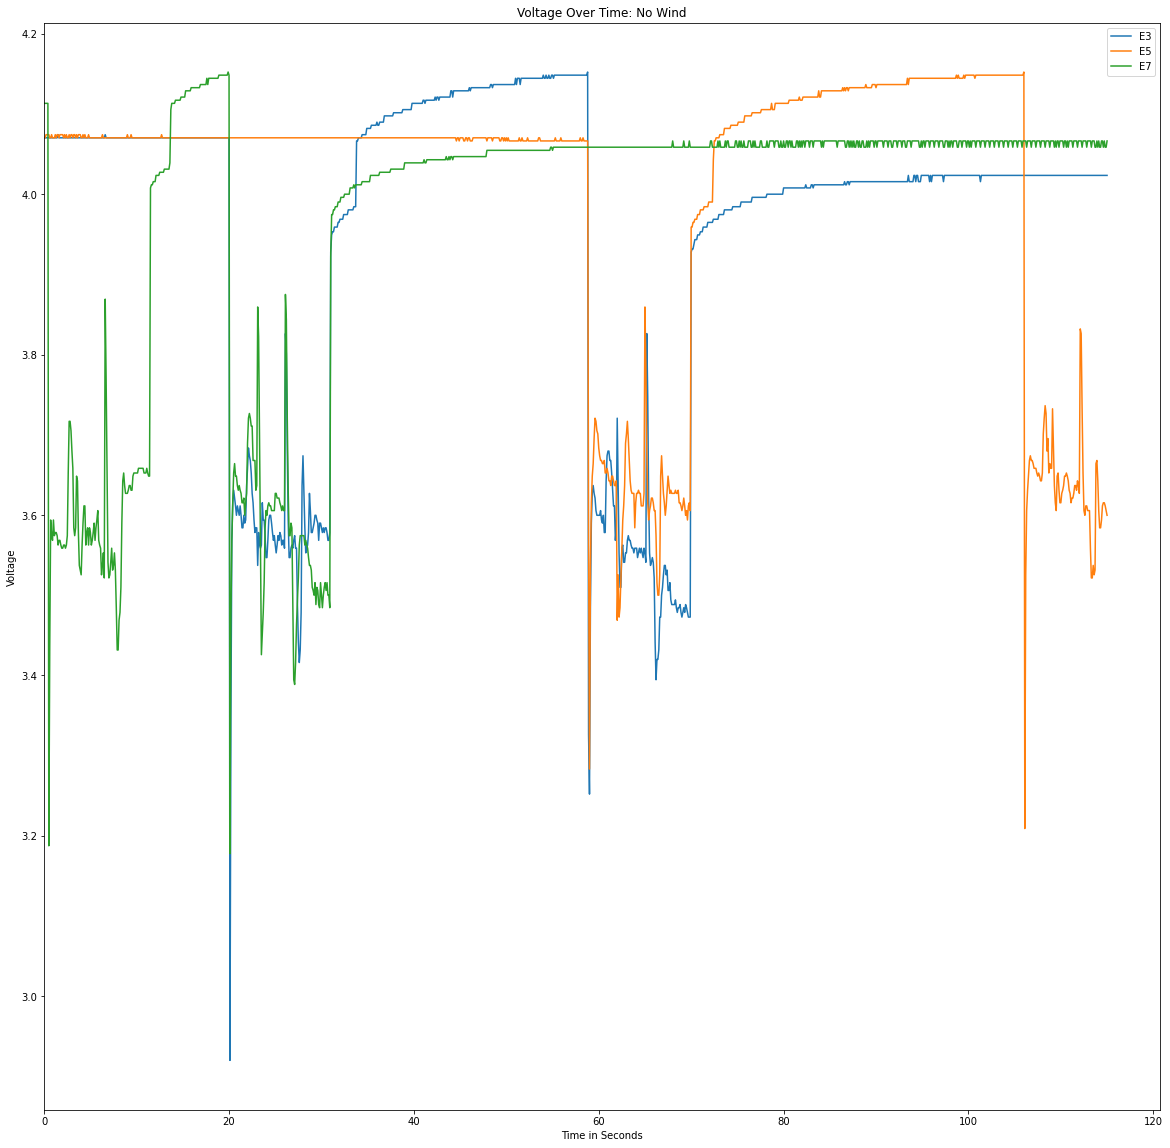

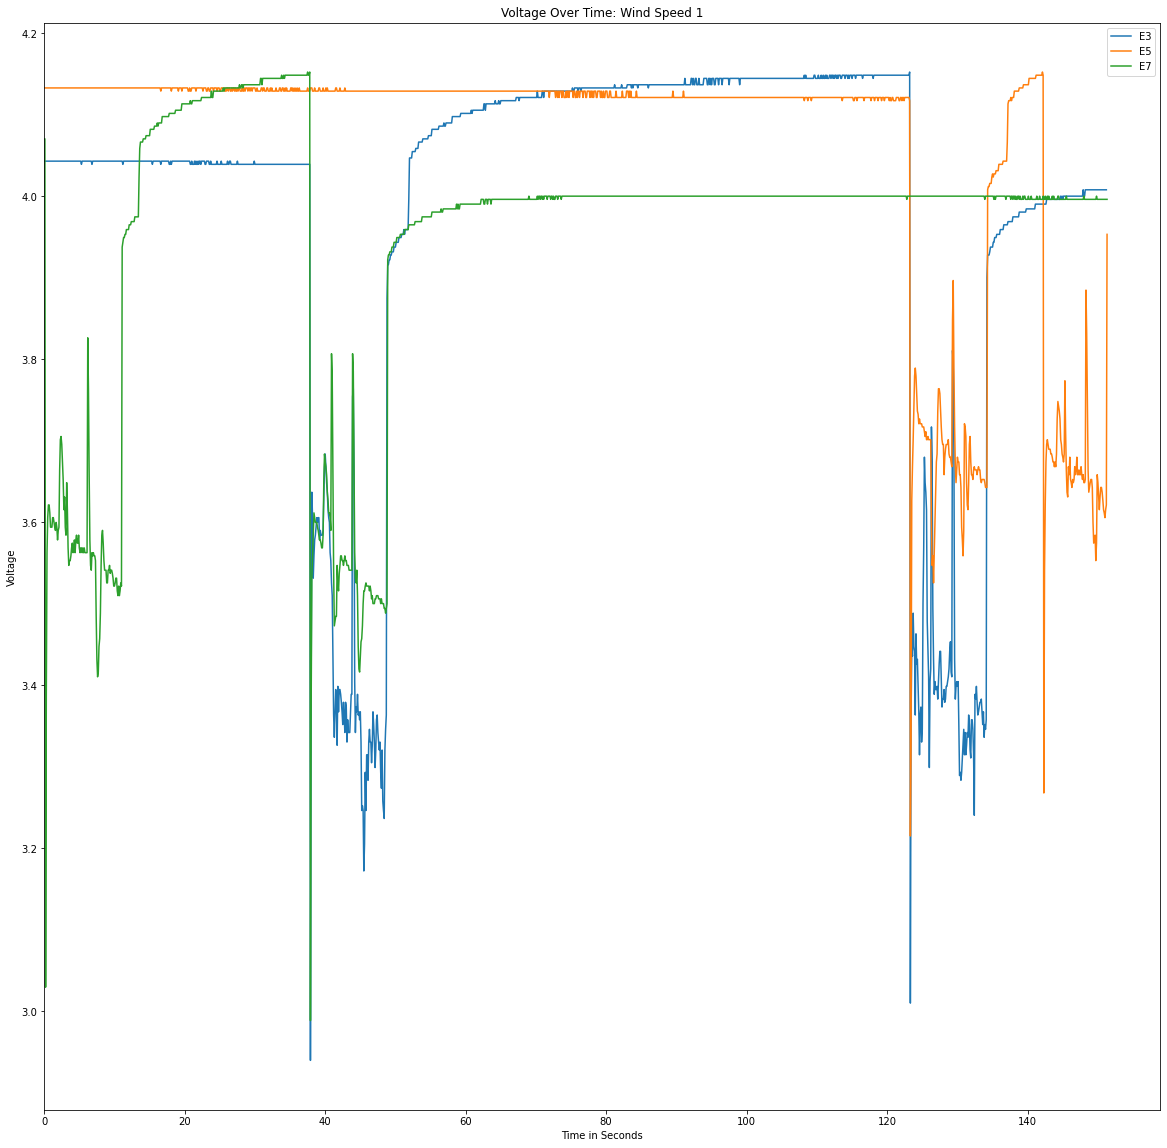

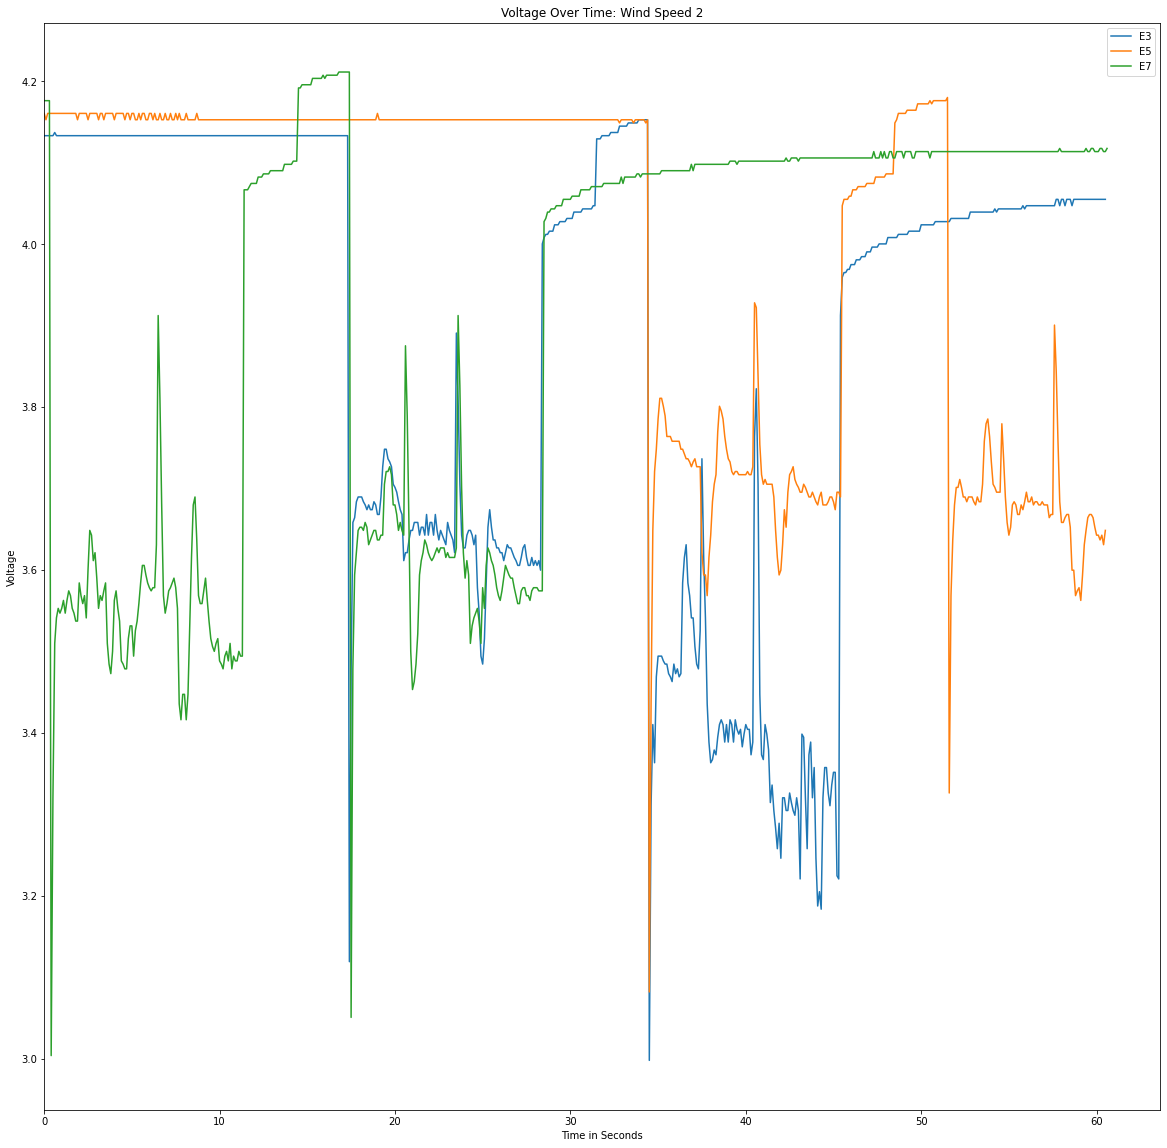

In [76]:
# ---------------------------------------------------------------------------
# ------------------------------BATTERY MAPPING------------------------------
# ---------------------------------------------------------------------------


# Graphing voltage over time.

# No Wind
batterygraph = dataE3_no_wind.plot(x="time.ms", y="pm.vbat")
dataE5_no_wind.plot(x="time.ms", y="pm.vbat", ax = batterygraph)
dataE7_no_wind.plot(x="time.ms", y ="pm.vbat", ax= batterygraph)
batterygraph.set_xlim(0, None)
batterygraph.legend(["E3","E5","E7"])
batterygraph.set_title("Voltage Over Time: No Wind")
batterygraph.set_xlabel("Time in Seconds")
batterygraph.set_ylabel("Voltage")


# Other syntax for plotting multiple graphs in one axes:
# fig = plt.figure()
# for frame in [dataE3, dataE5, dataE7]:
#     plt.plot(frame['time.ms'], frame['pm.vbat'])

plt.show()

# Wind Speed 1
batterygraph1 = dataE3_wind1.plot(x="time.ms", y="pm.vbat")
dataE5_wind1.plot(x="time.ms", y="pm.vbat", ax = batterygraph1)
dataE7_wind1.plot(x="time.ms", y ="pm.vbat", ax= batterygraph1)
batterygraph1.set_xlim(0, None)
batterygraph1.legend(["E3","E5","E7","relative wind direction"])
batterygraph1.set_title("Voltage Over Time: Wind Speed 1")
batterygraph1.set_xlabel("Time in Seconds")
batterygraph1.set_ylabel("Voltage")
# print(dataE3_wind1[int("time.ms")>15 and int("time.ms") < 30])
plt.show()

# Wind Speed 2
batterygraph2 = dataE3_wind2.plot(x="time.ms", y="pm.vbat")
dataE5_wind2.plot(x="time.ms", y="pm.vbat", ax = batterygraph2)
dataE7_wind2.plot(x="time.ms", y ="pm.vbat", ax= batterygraph2)
batterygraph2.set_xlim(0, None)
batterygraph2.legend(["E3","E5","E7"])
batterygraph2.set_title("Voltage Over Time: Wind Speed 2")
batterygraph2.set_xlabel("Time in Seconds")
batterygraph2.set_ylabel("Voltage")
plt.show()





     Unnamed: 0  time.ms  stateEstimate.x  stateEstimate.y  stateEstimate.z  \
100         100     10.0          1.28122        -0.325353              0.0   

     stabilizer.roll  stabilizer.pitch  stabilizer.yaw   pm.vbat  drone_id  \
100         -0.10808          0.677278        3.991439  4.042969         0   

              node_name  wind_speed  global_wind_direction  \
100  ['C1', 'F2', 'F1']         6.1                     90   

     relative_wind_direction  travel_dist waiting_time  
100                    450.0     0.026141  [16200|0|0]   ['relative_wind_direction']


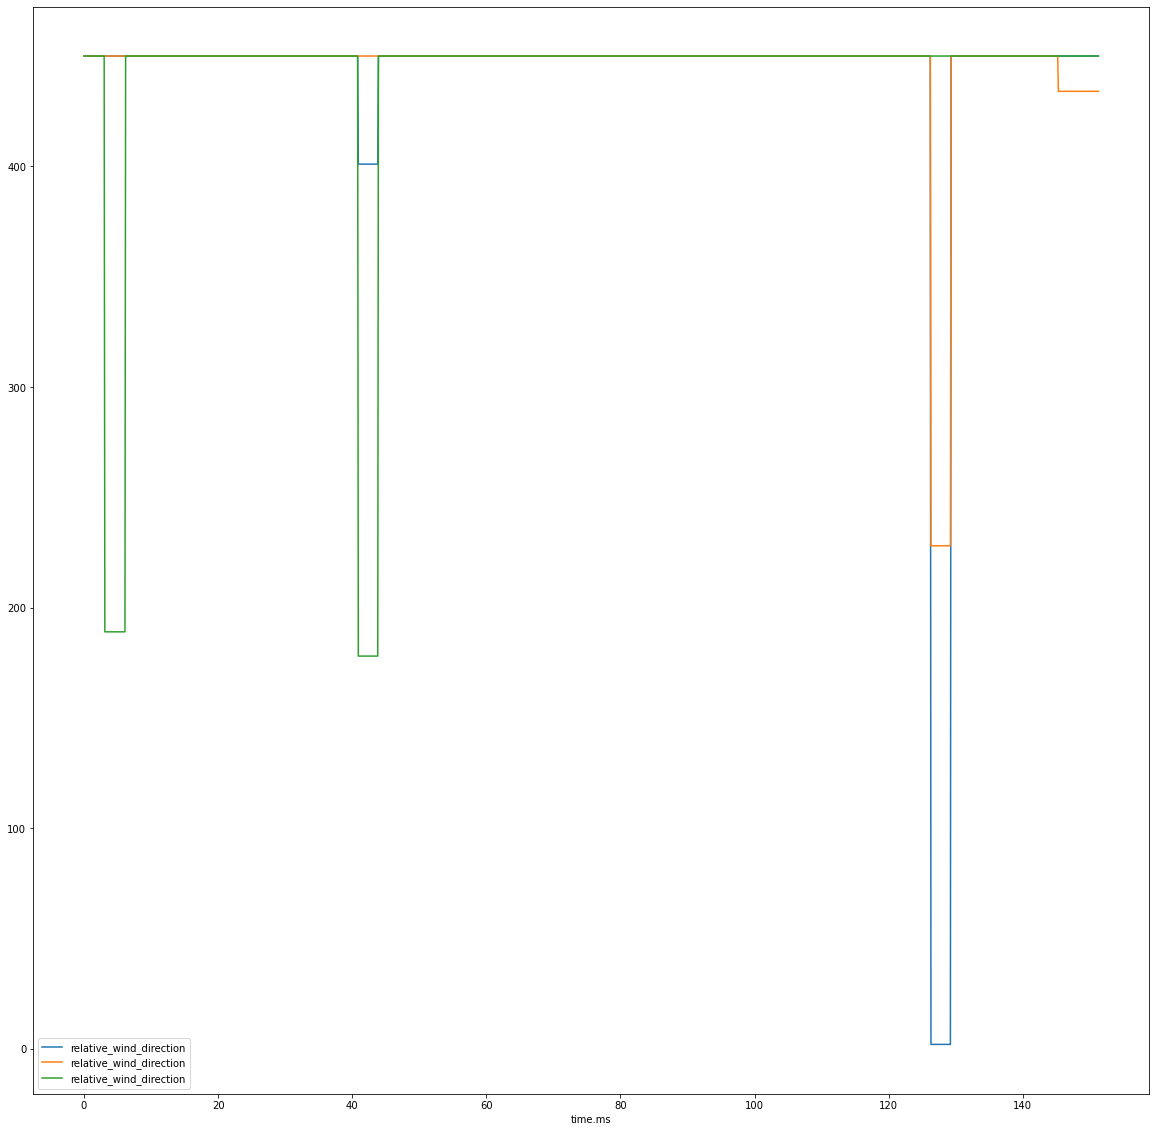

In [77]:
angle_plot = dataE3_wind1.plot(x="time.ms", y="relative_wind_direction")
dataE5_wind1.plot(x="time.ms", y="relative_wind_direction", ax = angle_plot)
dataE7_wind1.plot(x="time.ms", y="relative_wind_direction", ax = angle_plot)
print(dataE3_wind1.loc[dataE3_wind1['time.ms'] == 10], ['relative_wind_direction'])

# 250, 387

plt.show()

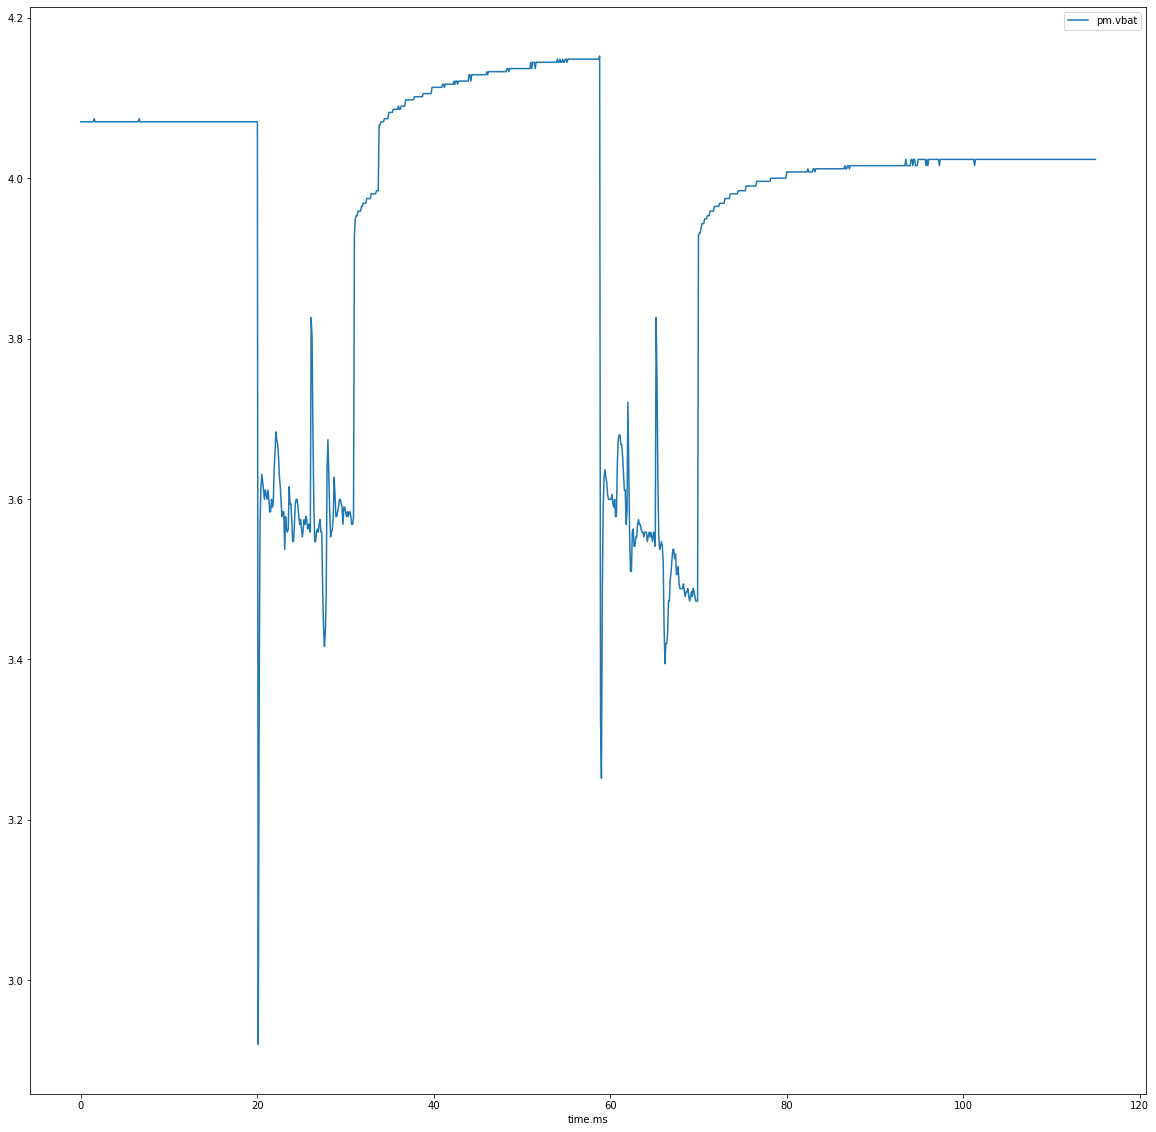

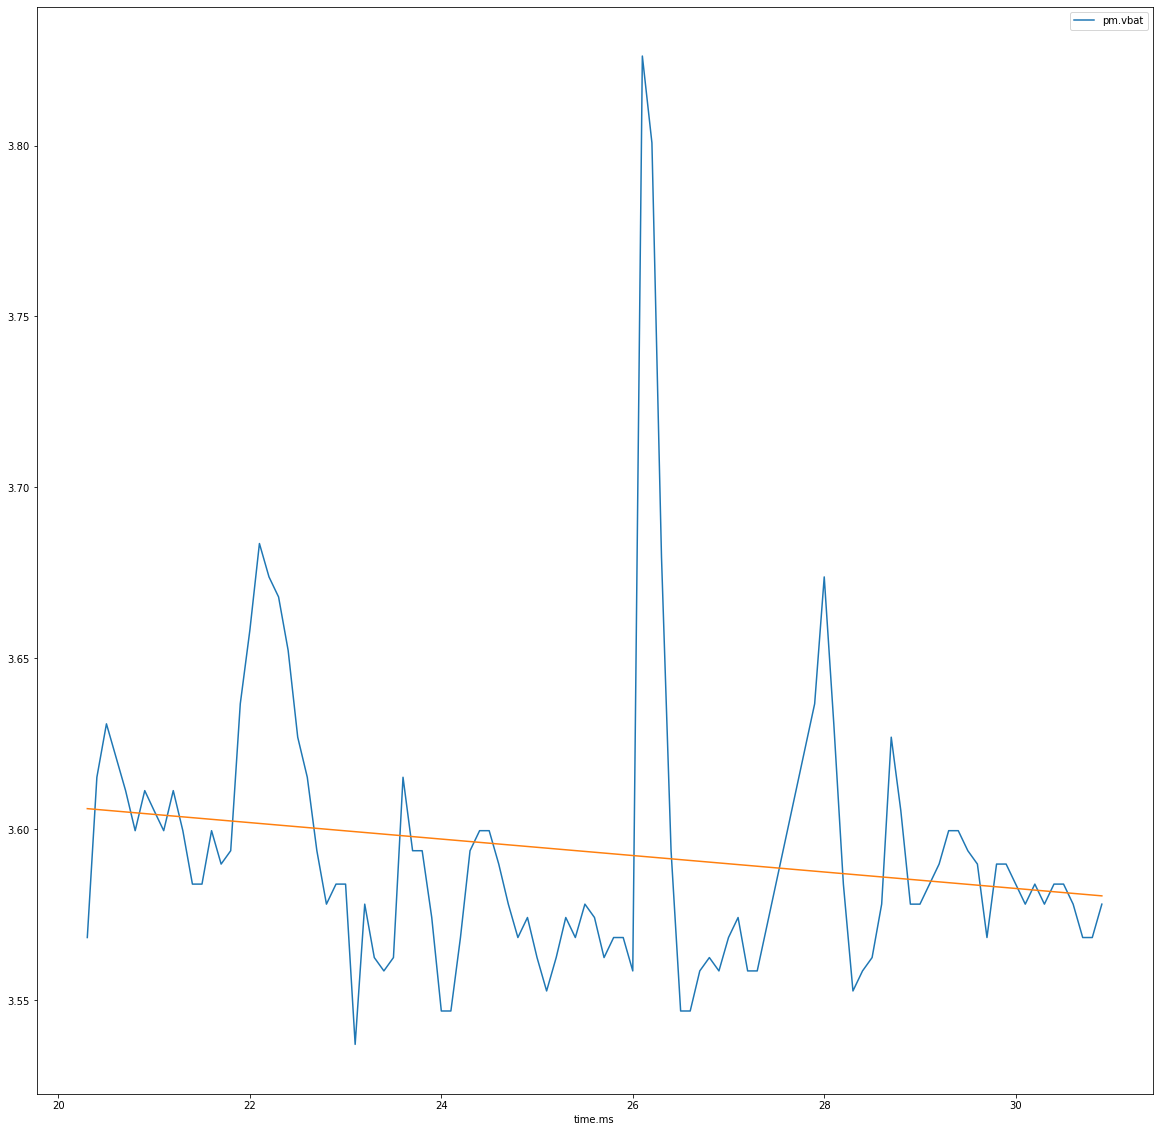

NO Wind Line Of Best Fit - E3 Seg 1: -0.002406859779775252
NO Wind Line Of Best Fit - E3 Seg 2: -0.0113006591040742


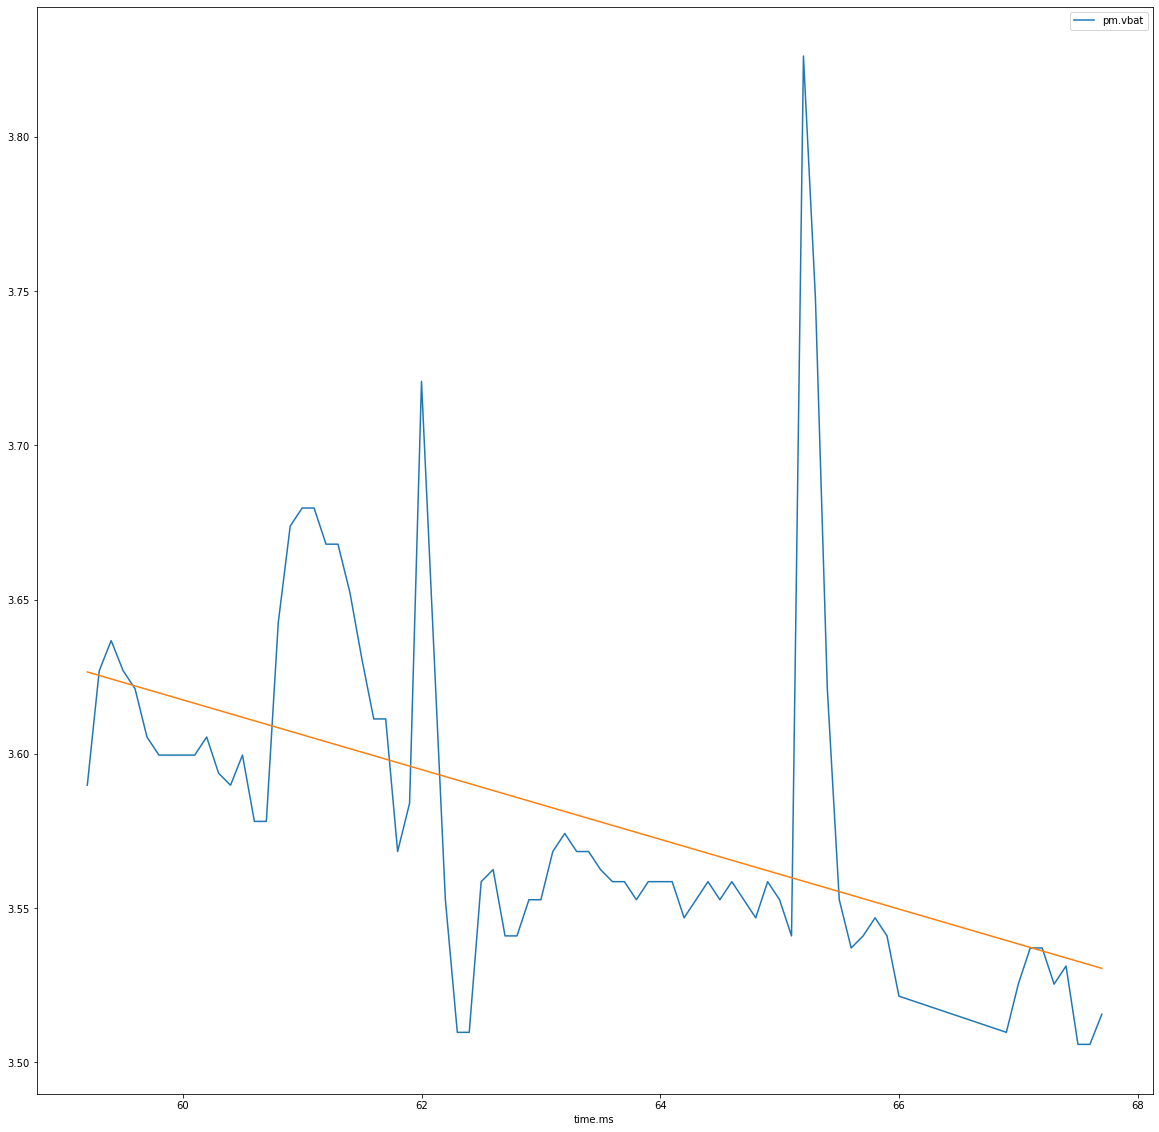

In [78]:
# SEGMENTS

# E3 No Wind 
cropped_values = (dataE3_no_wind.loc[(dataE3_no_wind["pm.vbat"] < 3.9) & (dataE3_no_wind["pm.vbat"] > 3.5)])
dataE3_no_wind.plot(x='time.ms', y = 'pm.vbat')
# cropped_plot = cropped_values.plot(x='time.ms', y = 'pm.vbat')

# Segments for Analysis
E3_nowind_1 = cropped_values.loc[(cropped_values["time.ms"] > 15) & (cropped_values["time.ms"] < 40)]
E3_nowind_2 = cropped_values.loc[(cropped_values["time.ms"] > 45) & (cropped_values["time.ms"] < 85)]
E3_nowind_1.plot(x='time.ms', y = 'pm.vbat')
m301, b301 = np.polyfit(E3_nowind_1["time.ms"], E3_nowind_1["pm.vbat"], 1)
plt.plot(E3_nowind_1["time.ms"], m301*E3_nowind_1["time.ms"]+b301, label="No wind")

plt.show()

E3_nowind_2.plot(x='time.ms', y = 'pm.vbat')
m302, b302 = np.polyfit(E3_nowind_2["time.ms"], E3_nowind_2["pm.vbat"], 1)
plt.plot(E3_nowind_2["time.ms"], m302*E3_nowind_2["time.ms"]+b302, label="No wind")
print("NO Wind Line Of Best Fit - E3 Seg 1: "+str(m301))
print("NO Wind Line Of Best Fit - E3 Seg 2: "+str(m302))
plt.show()









# To find relative wind direction angle:
# E3_nowind_1_angle = cropped_values.loc[(cropped_values["time.ms"] == 25)]



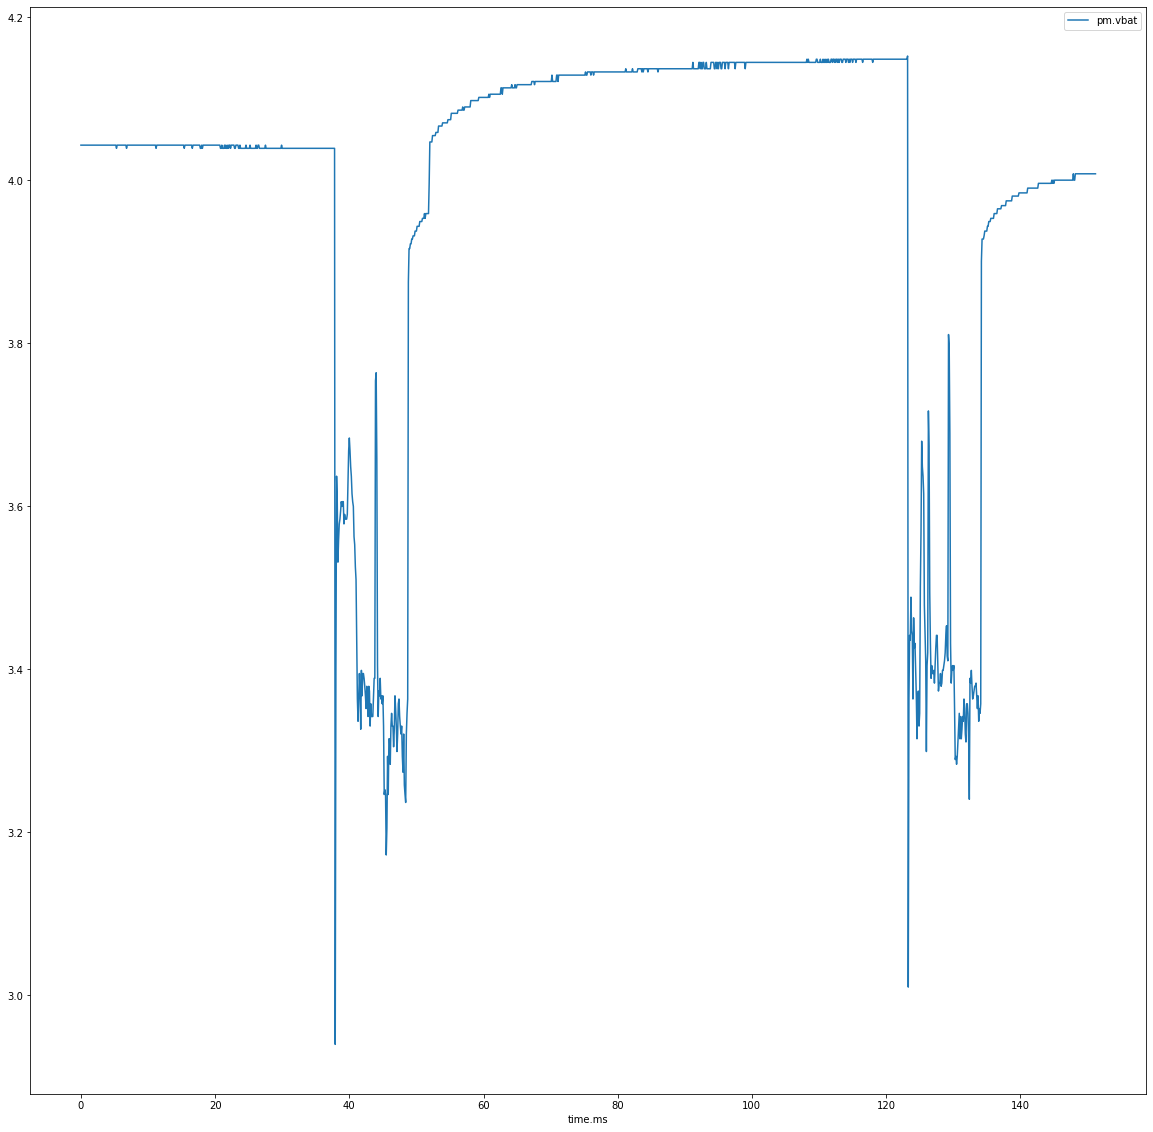

-0.028920518972233845
     relative_wind_direction
420                    401.0
-0.011936349495382284
      relative_wind_direction
1280                      2.0


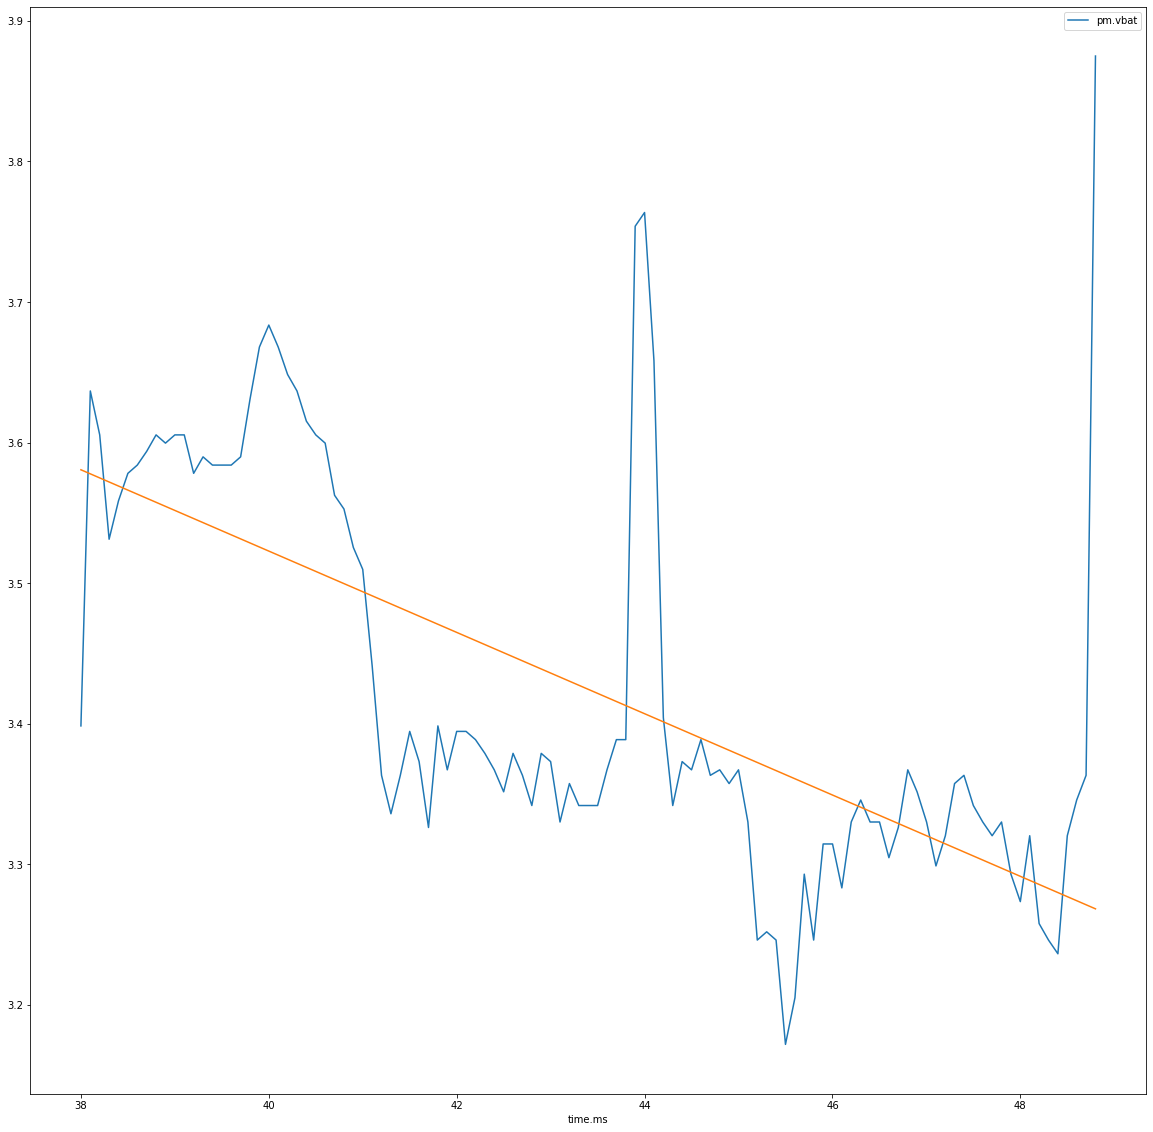

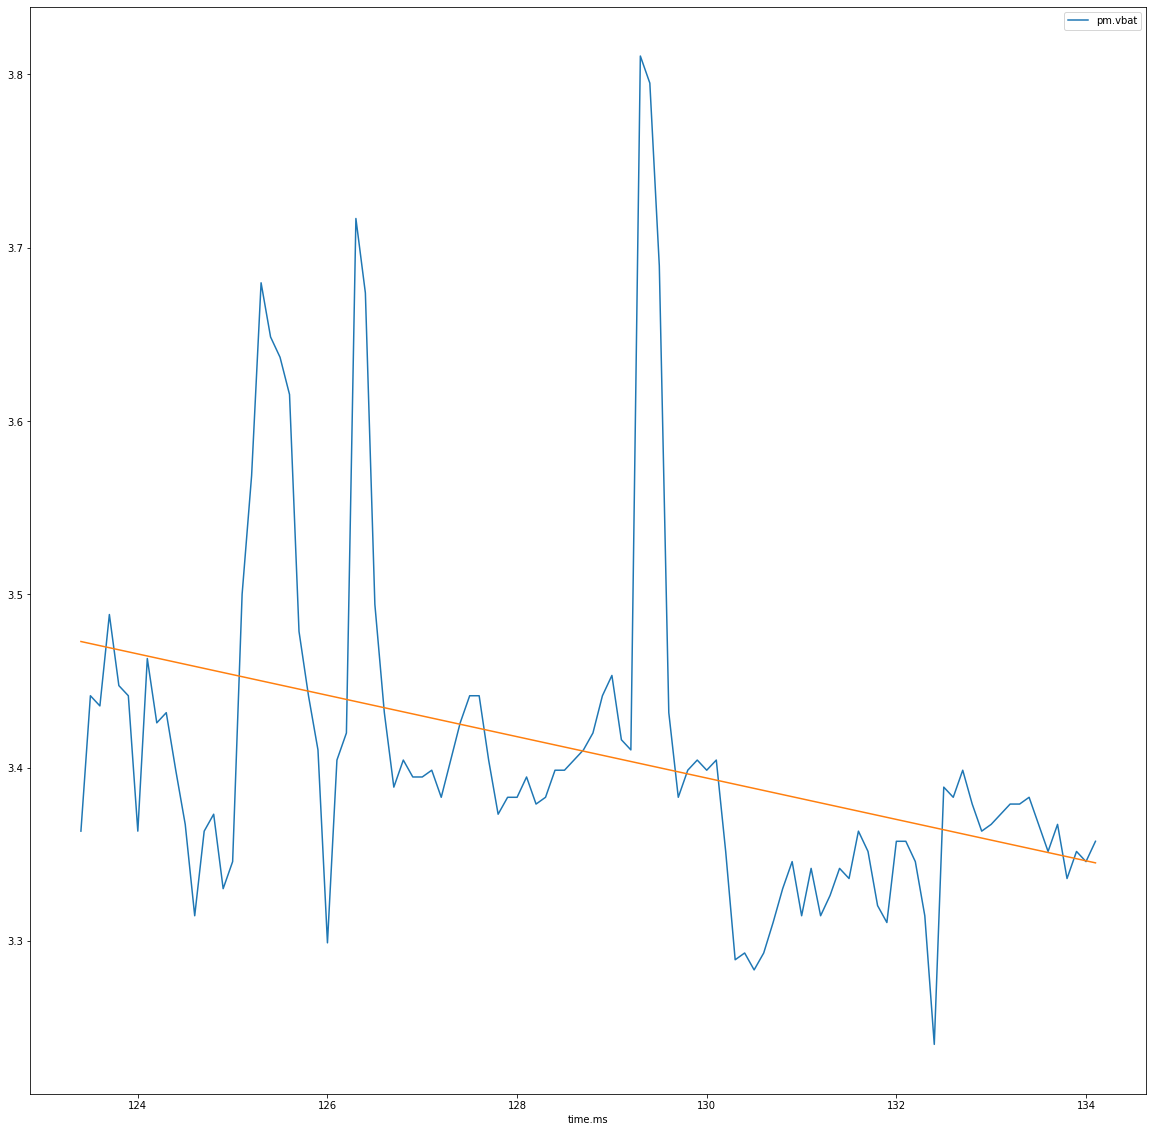

In [79]:
# E3 Wind 1 Segments
dataE3_wind1.plot(x='time.ms', y='pm.vbat')
plt.show()

# E3 Wind 1 Segment 1
E3_wind1_1 = dataE3_wind1.loc[(dataE3_wind1['time.ms'] > 30) & (dataE3_wind1['time.ms'] < 60) & (dataE3_wind1['pm.vbat'] > 3.1) & (dataE3_wind1['pm.vbat'] < 3.9)]
E3_wind1_1.plot(x='time.ms', y = 'pm.vbat')
m311, b311 = np.polyfit(E3_wind1_1["time.ms"], E3_wind1_1["pm.vbat"], 1)
plt.plot(E3_wind1_1["time.ms"], m311*E3_wind1_1["time.ms"]+b311, label="Wind 1")
print(m311)

# Relative Wind Angle
E3_wind1_1_angle = dataE3_wind1.loc[(dataE3_wind1["time.ms"] == 42), ['relative_wind_direction']]
print(E3_wind1_1_angle)

# E3 Wind 1 Segment 2
E3_wind1_2 = dataE3_wind1.loc[(dataE3_wind1['time.ms'] > 120) & (dataE3_wind1['time.ms'] < 140) & (dataE3_wind1['pm.vbat'] > 3.2) & (dataE3_wind1['pm.vbat'] < 3.9)]
E3_wind1_2.plot(x='time.ms', y = 'pm.vbat')
m312, b312 = np.polyfit(E3_wind1_2["time.ms"], E3_wind1_2["pm.vbat"], 1)
plt.plot(E3_wind1_2["time.ms"], m312*E3_wind1_2["time.ms"]+b312, label="Wind 1")
print(m312)

E3_wind1_2_angle = dataE3_wind1.loc[(dataE3_wind1["time.ms"] == 128), ['relative_wind_direction']]
print(E3_wind1_2_angle)



-0.007817024893429787
     relative_wind_direction
220                    401.0
-0.021662824552166775
     relative_wind_direction
380                      2.0


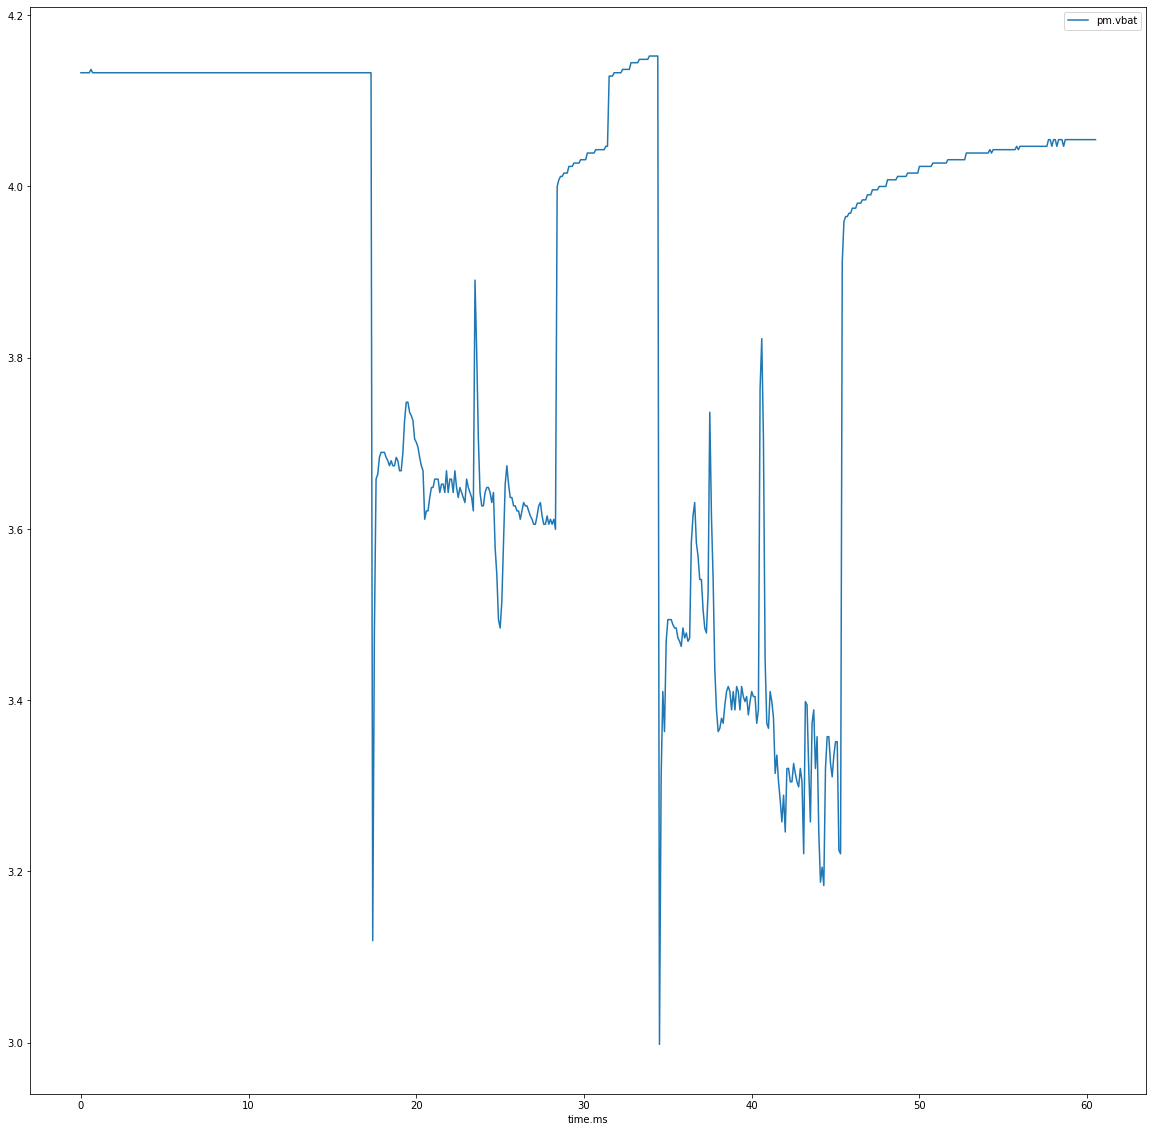

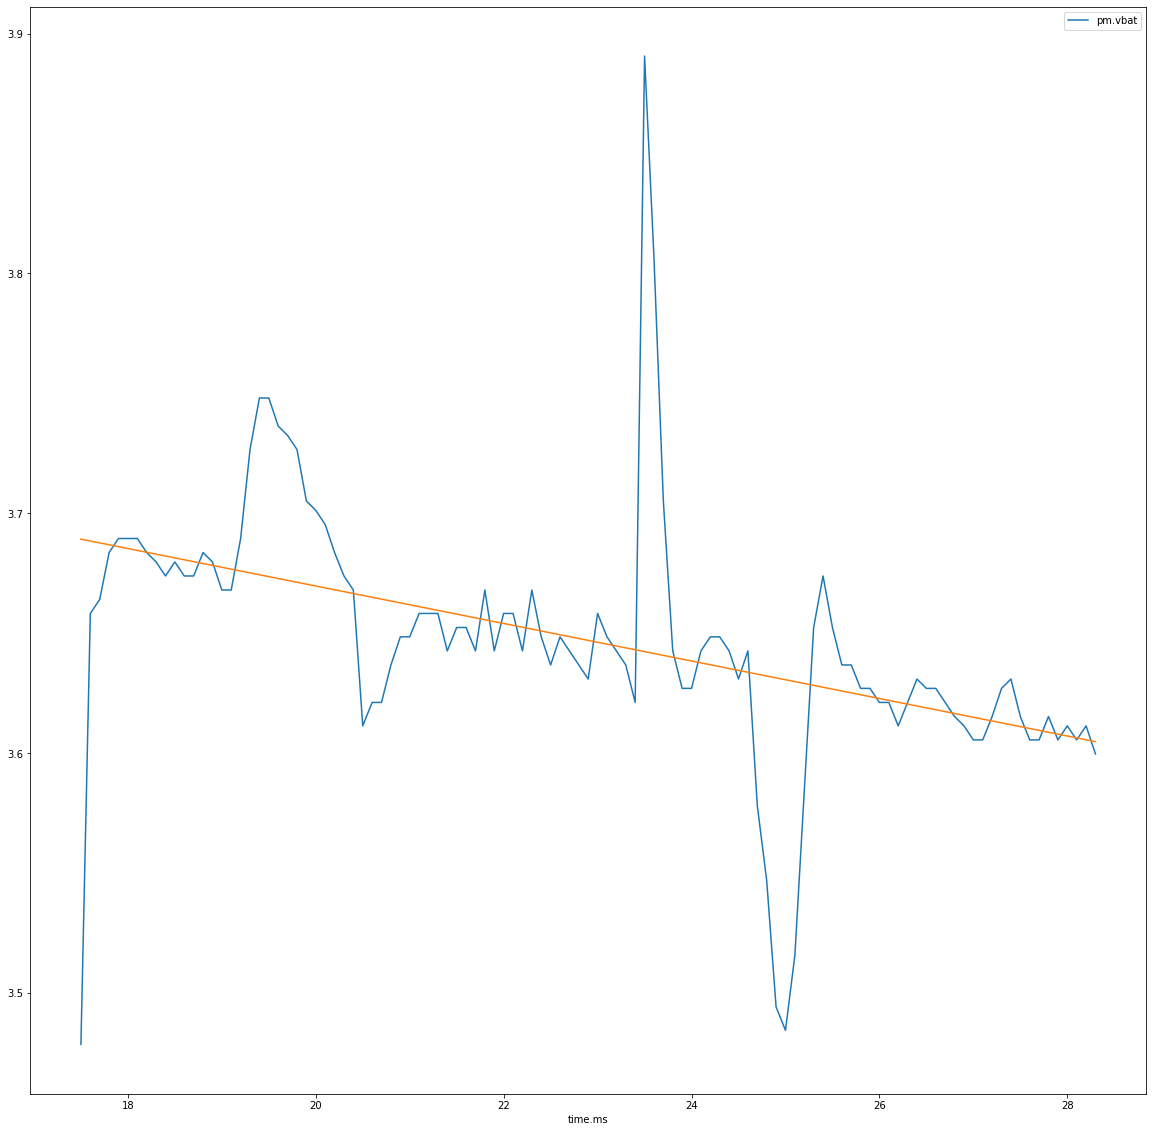

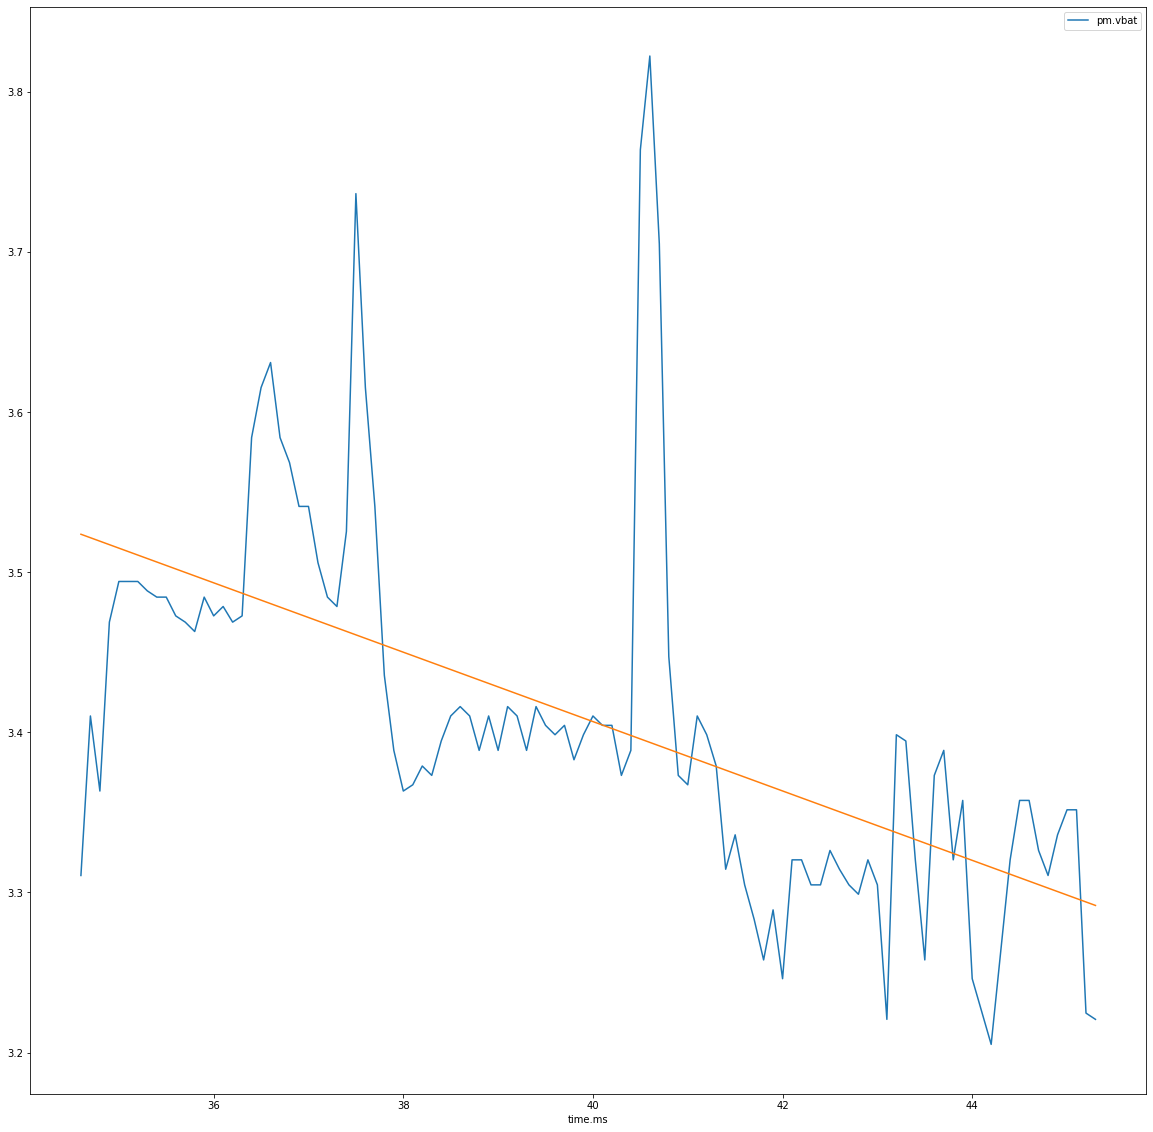

In [80]:
# E3 Wind 2 Segments
dataE3_wind2.plot(x='time.ms', y='pm.vbat')

# E3 Wind 2 Segment 1
E3_wind2_1 = dataE3_wind2.loc[(dataE3_wind2['time.ms'] > 15) & (dataE3_wind2['time.ms'] < 30) & (dataE3_wind2['pm.vbat'] > 3.2) & (dataE3_wind2['pm.vbat'] < 3.9)]
E3_wind2_1.plot(x='time.ms', y = 'pm.vbat')
m321, b321 = np.polyfit(E3_wind2_1["time.ms"], E3_wind2_1["pm.vbat"], 1)
plt.plot(E3_wind2_1["time.ms"], m321*E3_wind2_1["time.ms"]+b321, label="Wind 2")
print(m321)

# Relative Wind Angle
E3_wind2_1_angle = dataE3_wind2.loc[(dataE3_wind2["time.ms"] == 22), ['relative_wind_direction']]
print(E3_wind2_1_angle)

# E3 Wind 2 Segment 2
E3_wind2_2 = dataE3_wind2.loc[(dataE3_wind2['time.ms'] > 30) & (dataE3_wind2['time.ms'] < 50) & (dataE3_wind2['pm.vbat'] > 3.2) & (dataE3_wind2['pm.vbat'] < 3.9)]
E3_wind2_2.plot(x='time.ms', y = 'pm.vbat')
m322, b322 = np.polyfit(E3_wind2_2["time.ms"], E3_wind2_2["pm.vbat"], 1)
plt.plot(E3_wind2_2["time.ms"], m322*E3_wind2_2["time.ms"]+b322, label="Wind 2")
print(m322)

E3_wind2_2_angle = dataE3_wind2.loc[(dataE3_wind2["time.ms"] == 38), ['relative_wind_direction']]
print(E3_wind2_2_angle)


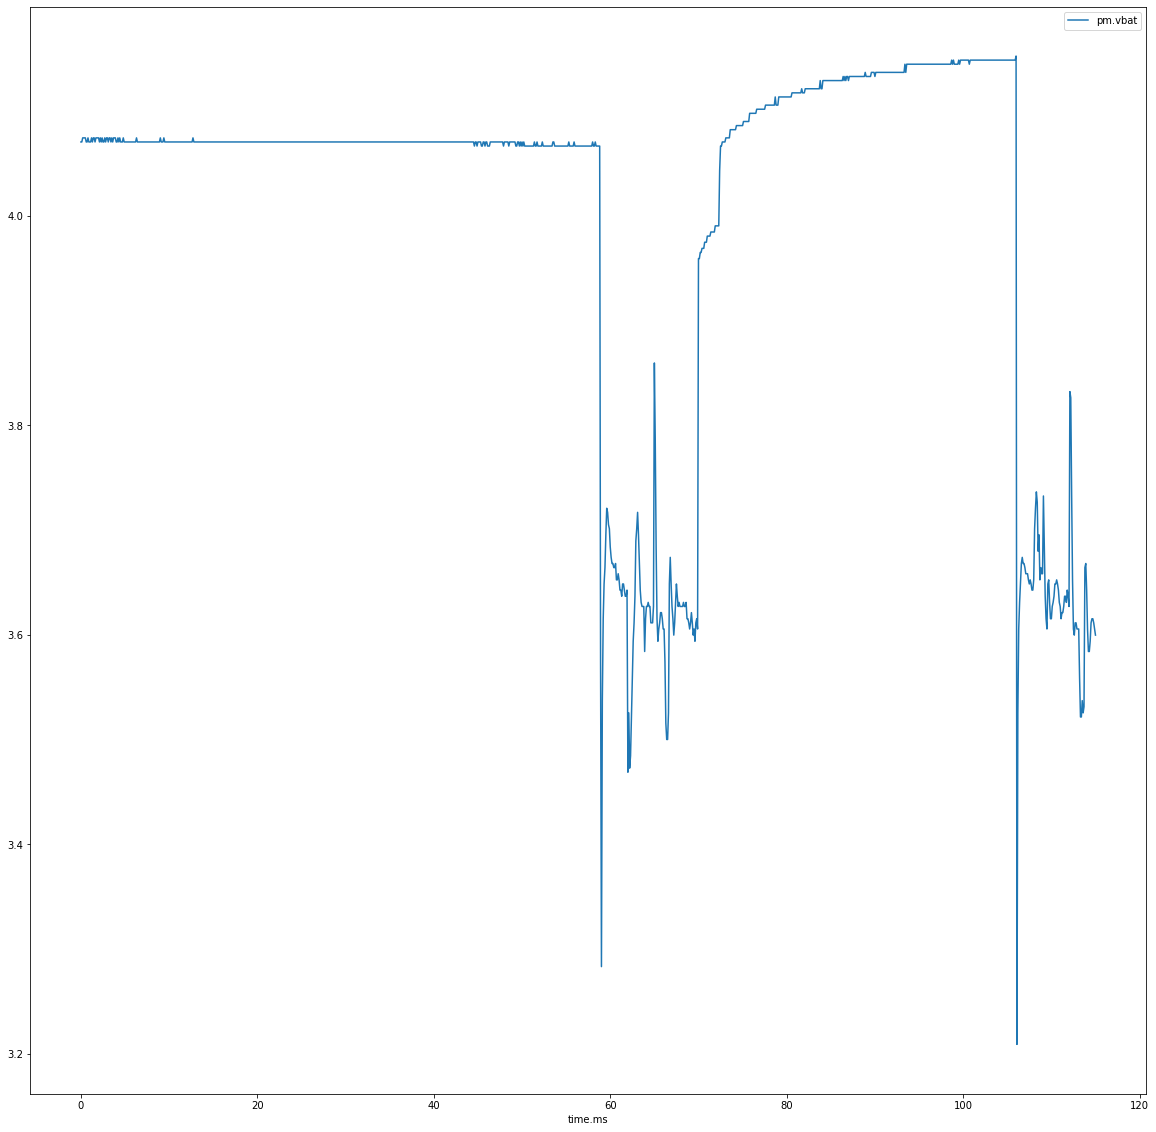

Gradient of Segment 1 E5 No Wind: -0.0036288798016654304
Gradient of Segment 2 E5 No Wind: -0.007479331588355326


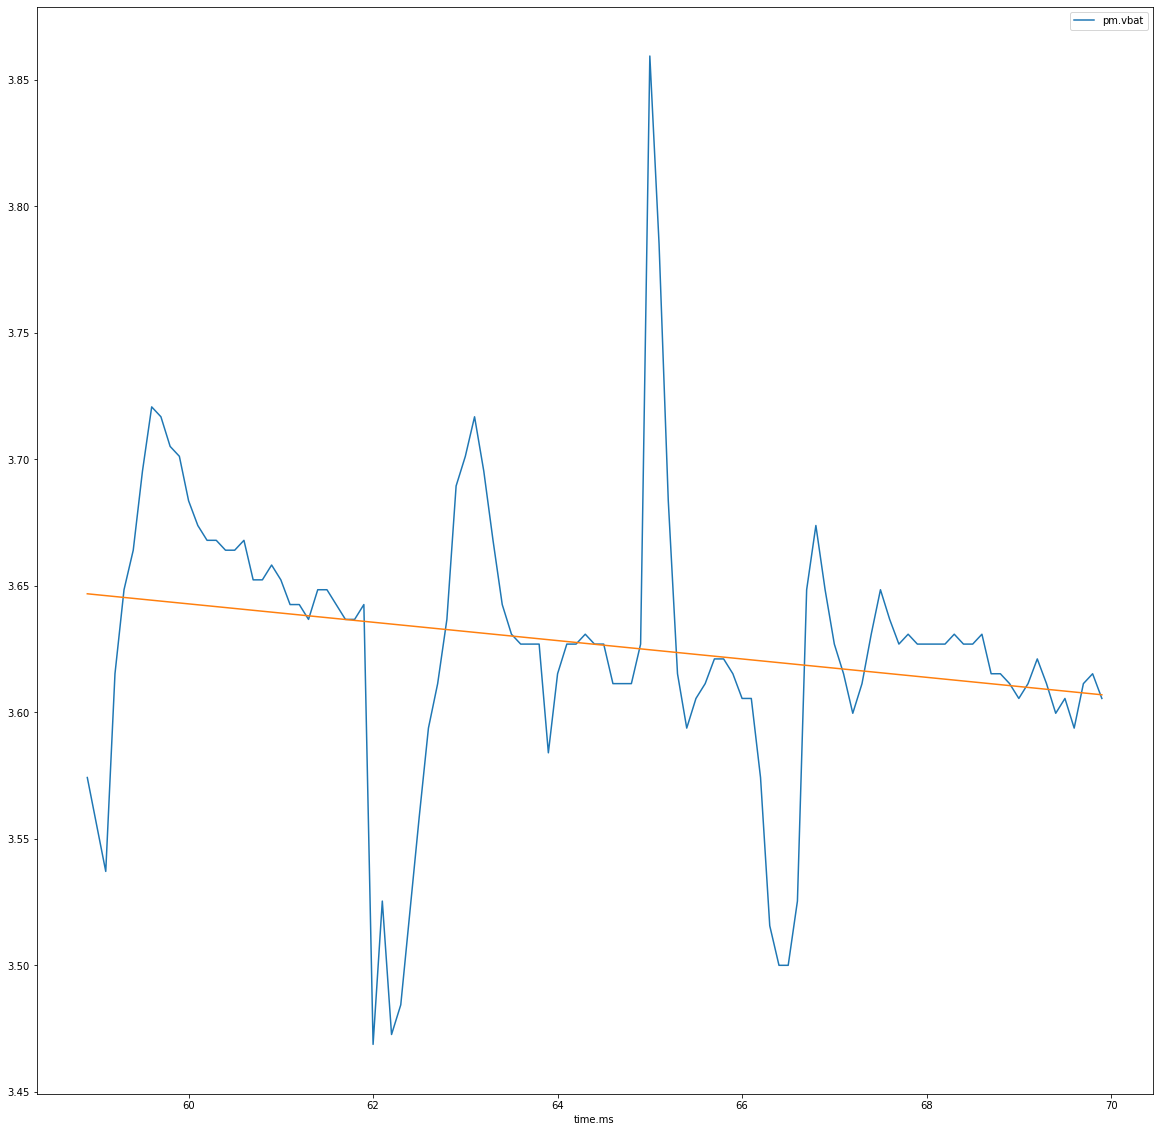

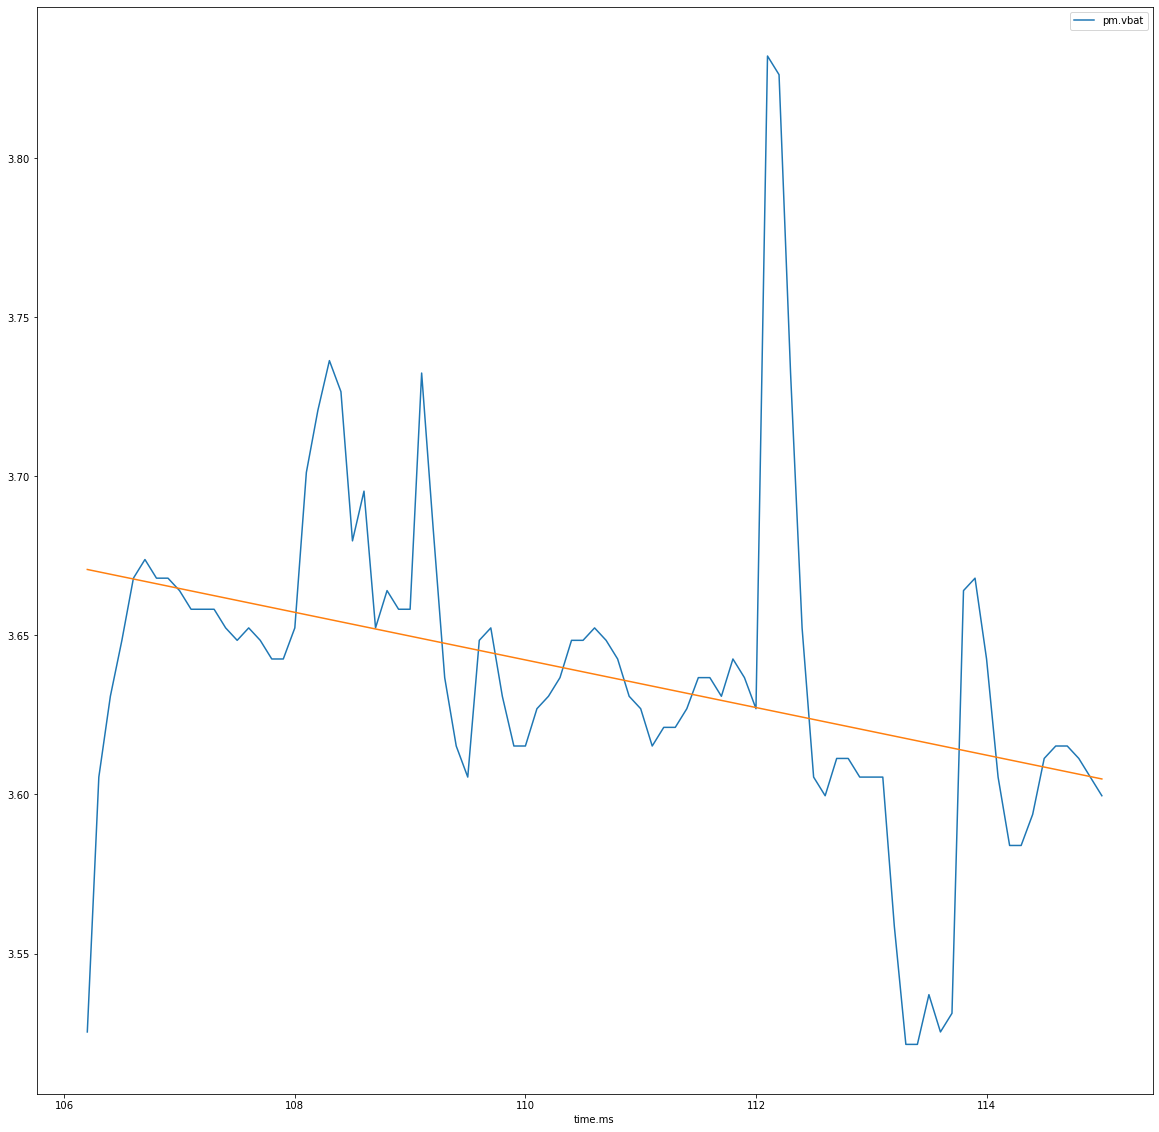

In [81]:
# E5 No Wind Segments

dataE5_no_wind.plot(x='time.ms', y='pm.vbat')
plt.show()

# E5 No Wind Segment 1
E5_nowind_1 = dataE5_no_wind.loc[(dataE5_no_wind['time.ms'] > 50) & (dataE5_no_wind['time.ms'] < 75) & (dataE5_no_wind['pm.vbat'] > 3.4) & (dataE5_no_wind['pm.vbat'] < 3.9)]
E5_nowind_1.plot(x='time.ms', y = 'pm.vbat')
m501, b501 = np.polyfit(E5_nowind_1["time.ms"], E5_nowind_1["pm.vbat"], 1)
plt.plot(E5_nowind_1["time.ms"], m501*E5_nowind_1["time.ms"]+b501, label="No wind")
print("Gradient of Segment 1 E5 No Wind: "+str(m501))


# E5 No Wind Segment 2
E5_nowind_2 = dataE5_no_wind.loc[(dataE5_no_wind['time.ms'] > 100) & (dataE5_no_wind['time.ms'] < 120) & (dataE5_no_wind['pm.vbat'] > 3.4) & (dataE5_no_wind['pm.vbat'] < 3.9)]
E5_nowind_2.plot(x='time.ms', y = 'pm.vbat')
m502, b502 = np.polyfit(E5_nowind_2["time.ms"], E5_nowind_2["pm.vbat"], 1)
plt.plot(E5_nowind_2["time.ms"], m502*E5_nowind_2["time.ms"]+ b502, label="No wind")
print("Gradient of Segment 2 E5 No Wind: "+str(m502))




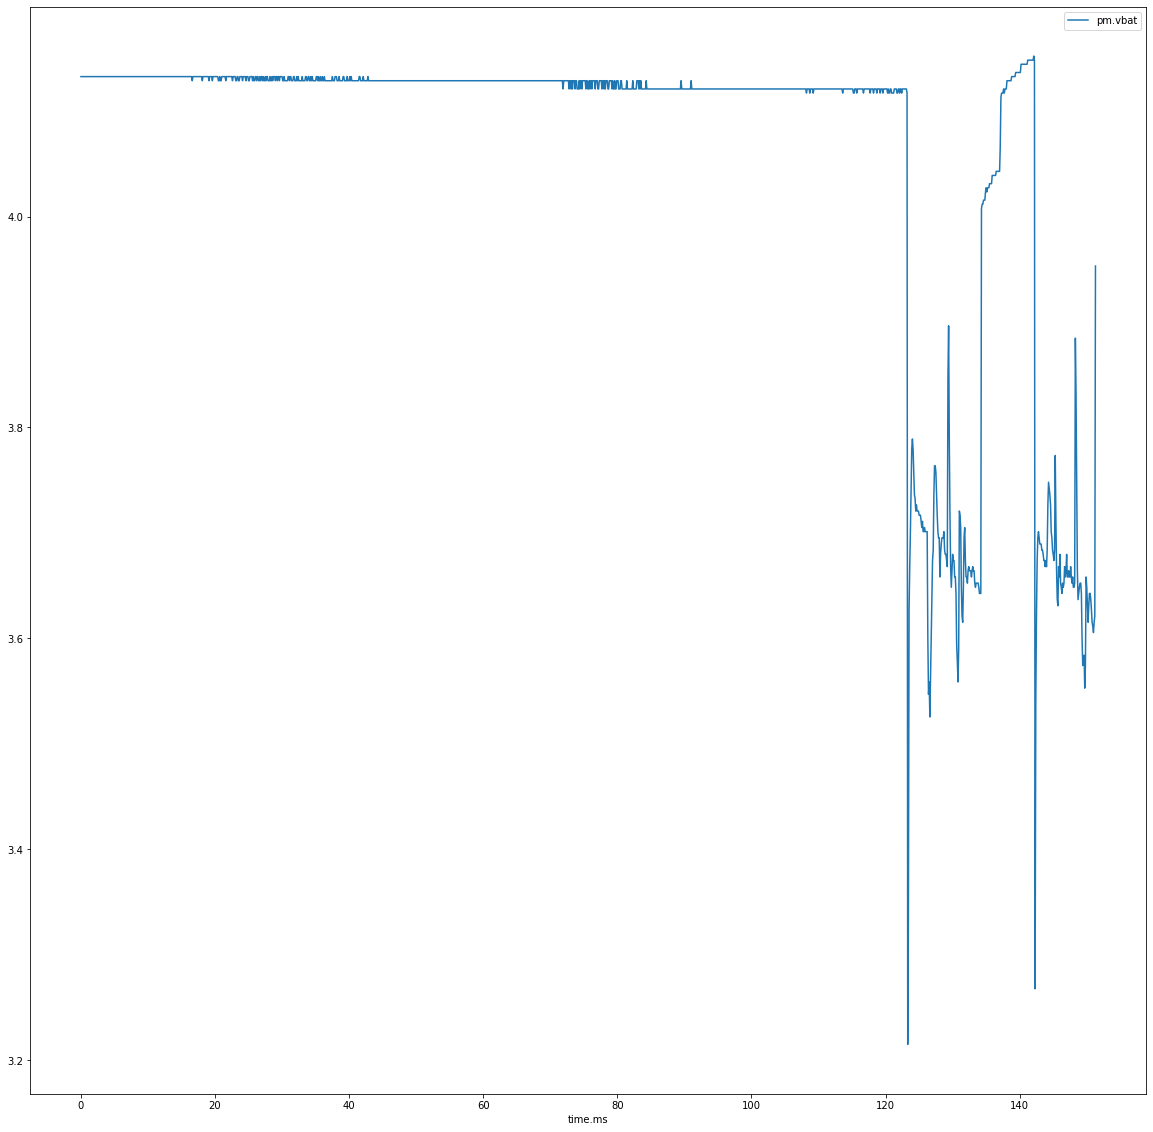

-0.004736035706404994
Relative wind direction:       relative_wind_direction
1280                    228.0
-0.007720686901395843
      relative_wind_direction
1460                    434.0


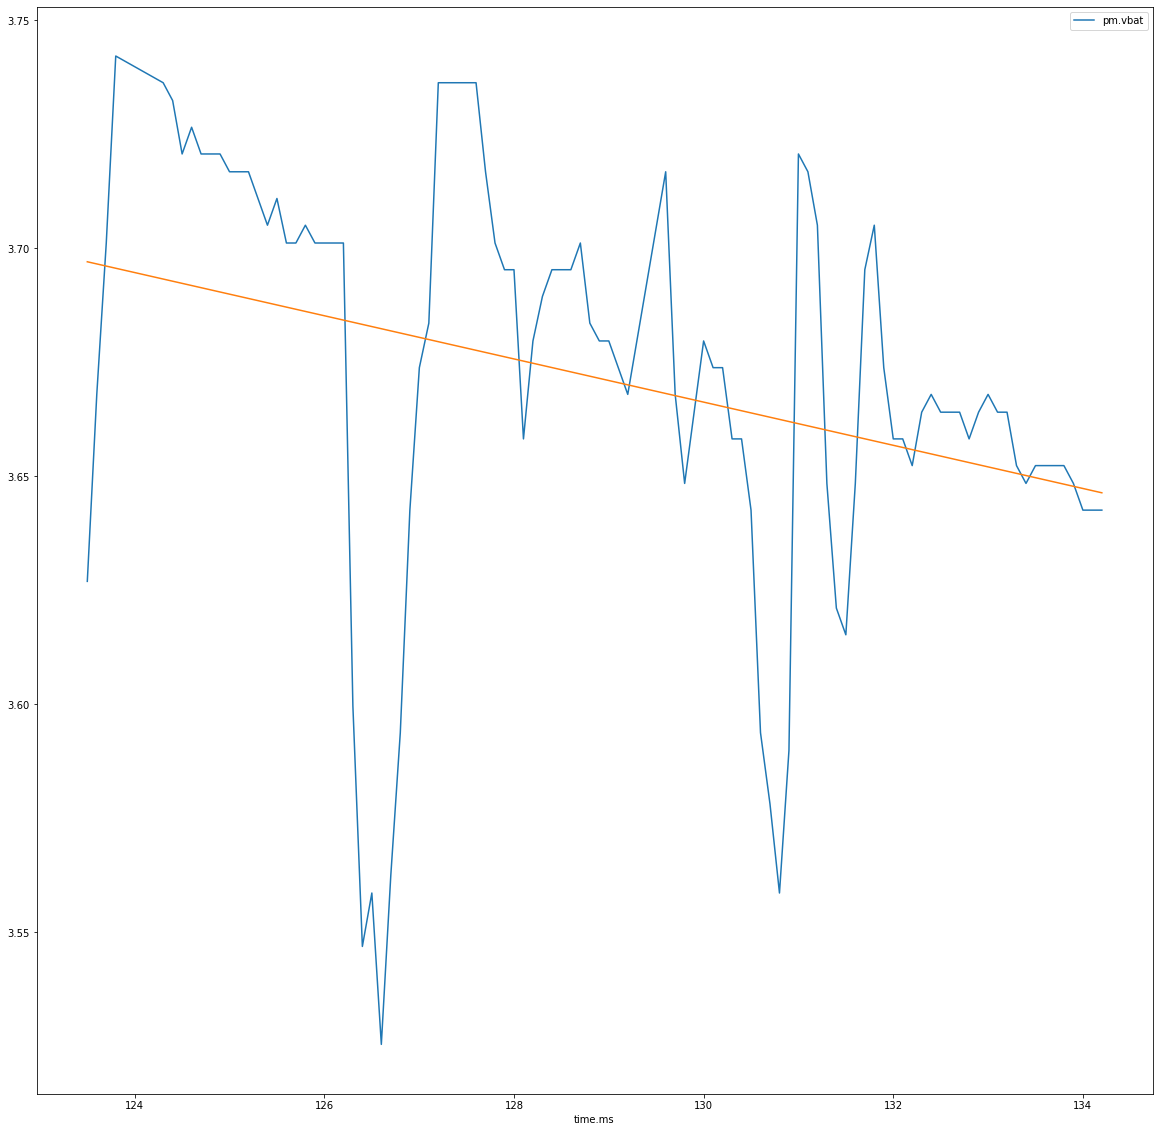

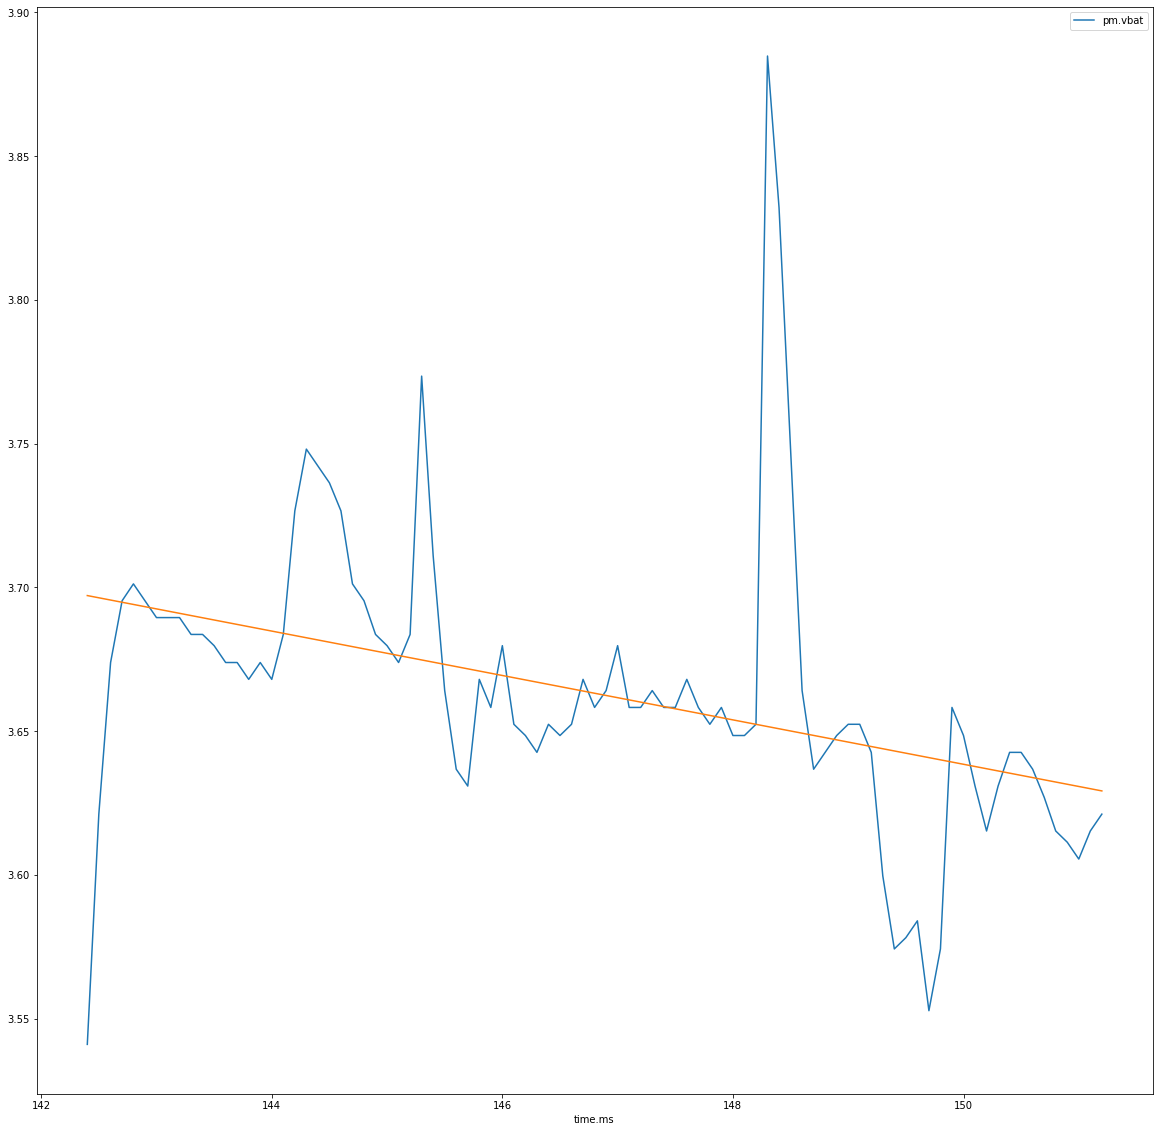

In [82]:
# E5 Wind 1 Segments 

dataE5_wind1.plot(x='time.ms', y='pm.vbat')
plt.show()

# E3 Wind 1 Segment 1
E5_wind1_1 = dataE5_wind1.loc[(dataE5_wind1['time.ms'] > 120) & (dataE5_wind1['time.ms'] < 140) & (dataE5_wind1['pm.vbat'] > 3.4) & (dataE5_wind1['pm.vbat'] < 3.75)]
E5_wind1_1.plot(x='time.ms', y = 'pm.vbat')
m511, b511 = np.polyfit(E5_wind1_1["time.ms"], E5_wind1_1["pm.vbat"], 1)
plt.plot(E5_wind1_1["time.ms"], m511*E5_wind1_1["time.ms"]+b511, label="Wind 1")
print(m511)

# Relative Wind Angle
E5_wind1_1_angle = dataE5_wind1.loc[(dataE5_wind1["time.ms"] == 128), ['relative_wind_direction']]
print("Relative wind direction: "+str(E5_wind1_1_angle))

# E3 Wind 1 Segment 2
E5_wind1_2 = dataE5_wind1.loc[(dataE5_wind1['time.ms'] > 140) & (dataE5_wind1['time.ms'] < 160) & (dataE5_wind1['pm.vbat'] > 3.3) & (dataE5_wind1['pm.vbat'] < 3.9)]
E5_wind1_2.plot(x='time.ms', y = 'pm.vbat')
m512, b512 = np.polyfit(E5_wind1_2["time.ms"], E5_wind1_2["pm.vbat"], 1)
plt.plot(E5_wind1_2["time.ms"], m512*E5_wind1_2["time.ms"]+b512, label="Wind 1")
print(m512)

E5_wind1_2_angle = dataE5_wind1.loc[(dataE5_wind1["time.ms"] == 146), ['relative_wind_direction']]
print(E5_wind1_2_angle)




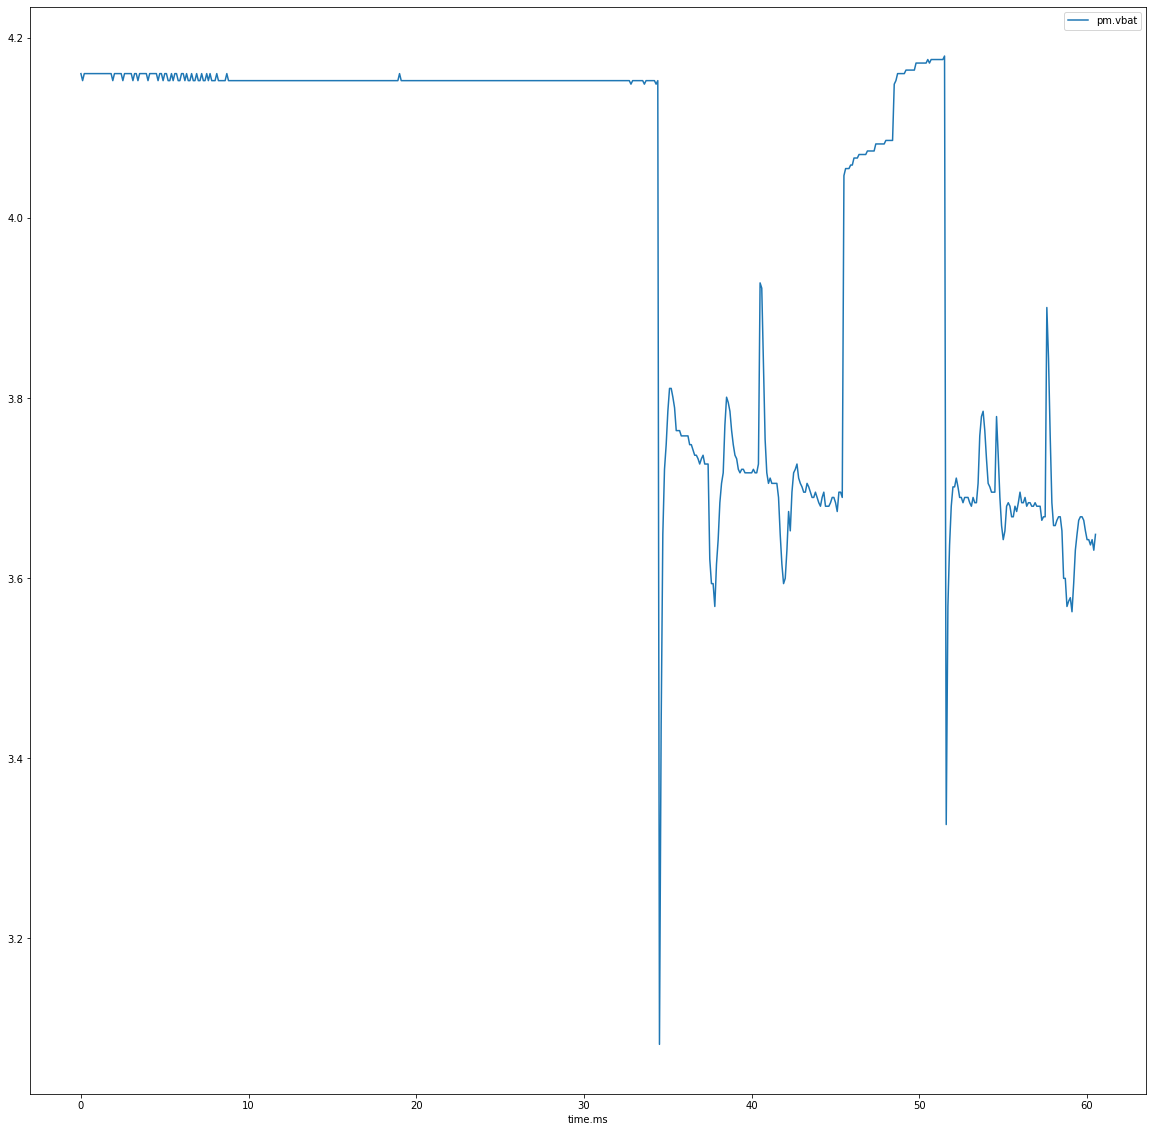

Gradient of E5 Segment 1 Wind 2: -0.006713828357907887
     relative_wind_direction
400                    228.0
-0.007897584396650916
     relative_wind_direction
560                    434.0


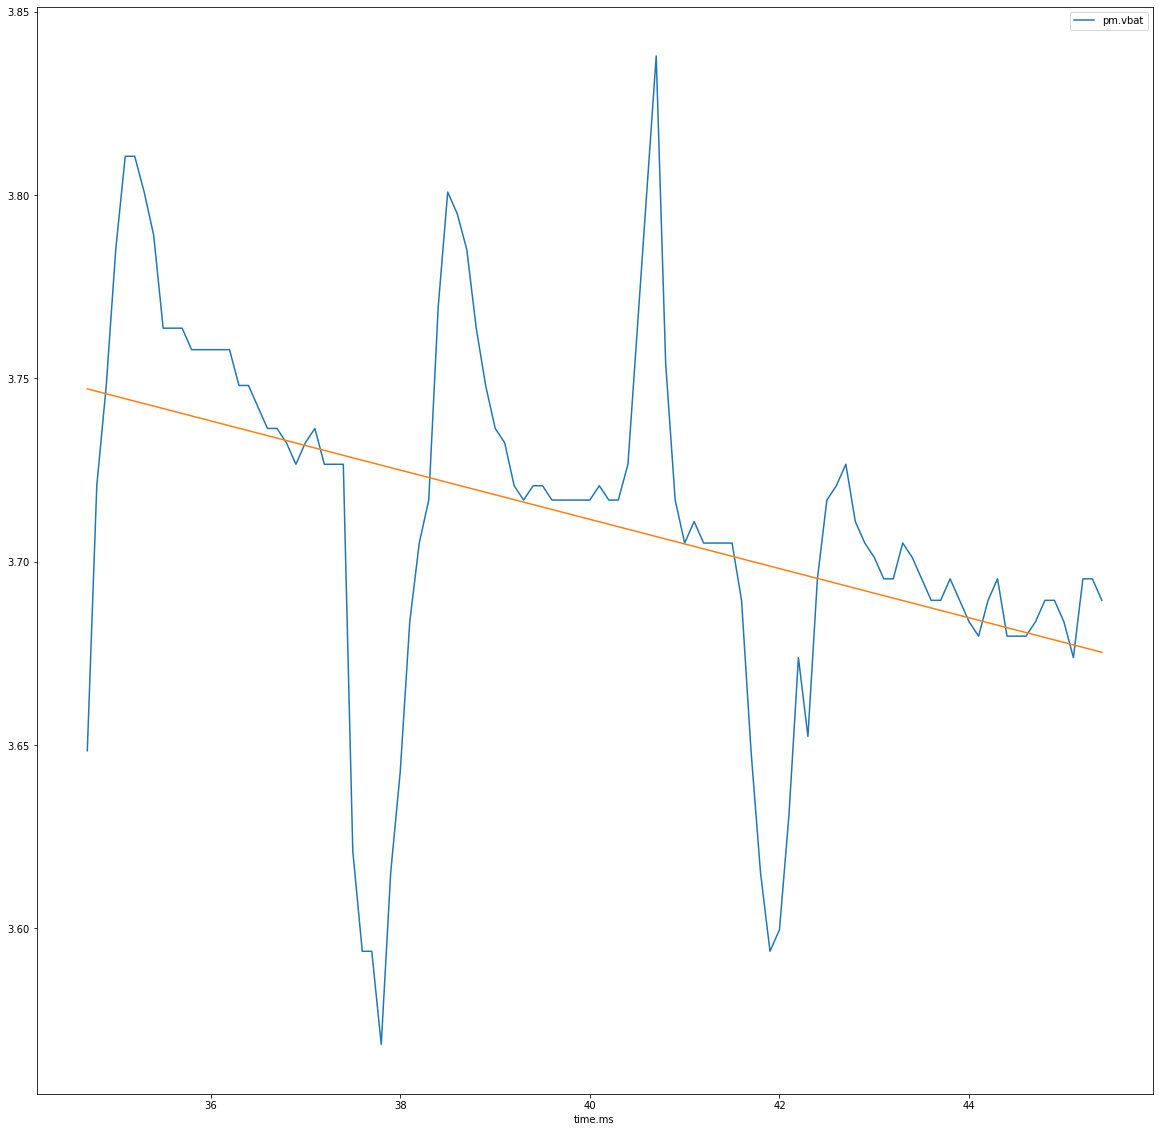

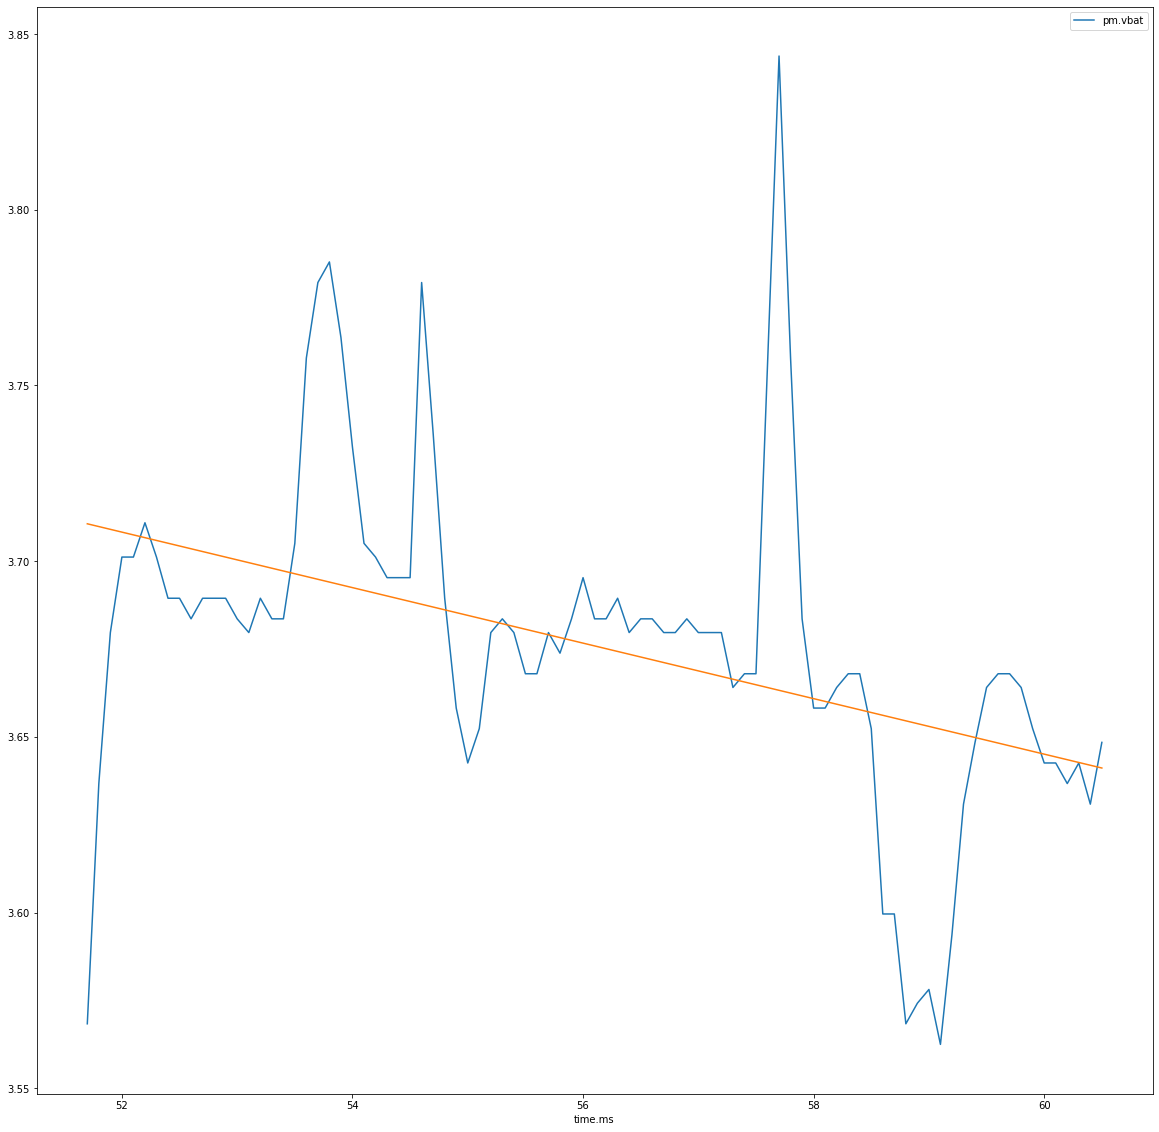

In [83]:
# E5 Wind 2 Segments
dataE5_wind2.plot(x='time.ms', y='pm.vbat')
plt.show()

# E5 Wind 2 Segment 1
E5_wind2_1 = dataE5_wind2.loc[(dataE5_wind2['time.ms'] > 30) & (dataE5_wind2['time.ms'] < 50) & (dataE5_wind2['pm.vbat'] > 3.5) & (dataE5_wind2['pm.vbat'] < 3.9)]
E5_wind2_1.plot(x='time.ms', y = 'pm.vbat')
m521, b521 = np.polyfit(E5_wind2_1["time.ms"], E5_wind2_1["pm.vbat"], 1)
plt.plot(E5_wind2_1["time.ms"], m521*E5_wind2_1["time.ms"]+b521, label="Wind 2")
print("Gradient of E5 Segment 1 Wind 2: "+ str(m521))


# Relative Wind Angle
E5_wind2_1_angle = dataE5_wind2.loc[(dataE5_wind2["time.ms"] == 40), ['relative_wind_direction']]
print(E5_wind2_1_angle)

# E5 Wind 2 Segment 2
E5_wind2_2 = dataE5_wind2.loc[(dataE5_wind2['time.ms'] > 50) & (dataE5_wind2['time.ms'] < 65) & (dataE5_wind2['pm.vbat'] > 3.5) & (dataE5_wind2['pm.vbat'] < 3.9)]
E5_wind2_2.plot(x='time.ms', y = 'pm.vbat')
m522, b522 = np.polyfit(E5_wind2_2["time.ms"], E5_wind2_2["pm.vbat"], 1)
plt.plot(E5_wind2_2["time.ms"], m522*E5_wind2_2["time.ms"]+b522, label="Wind 2")
print(m522)

E5_wind2_2_angle = dataE5_wind2.loc[(dataE5_wind2["time.ms"] == 56), ['relative_wind_direction']]
print(E5_wind2_2_angle)


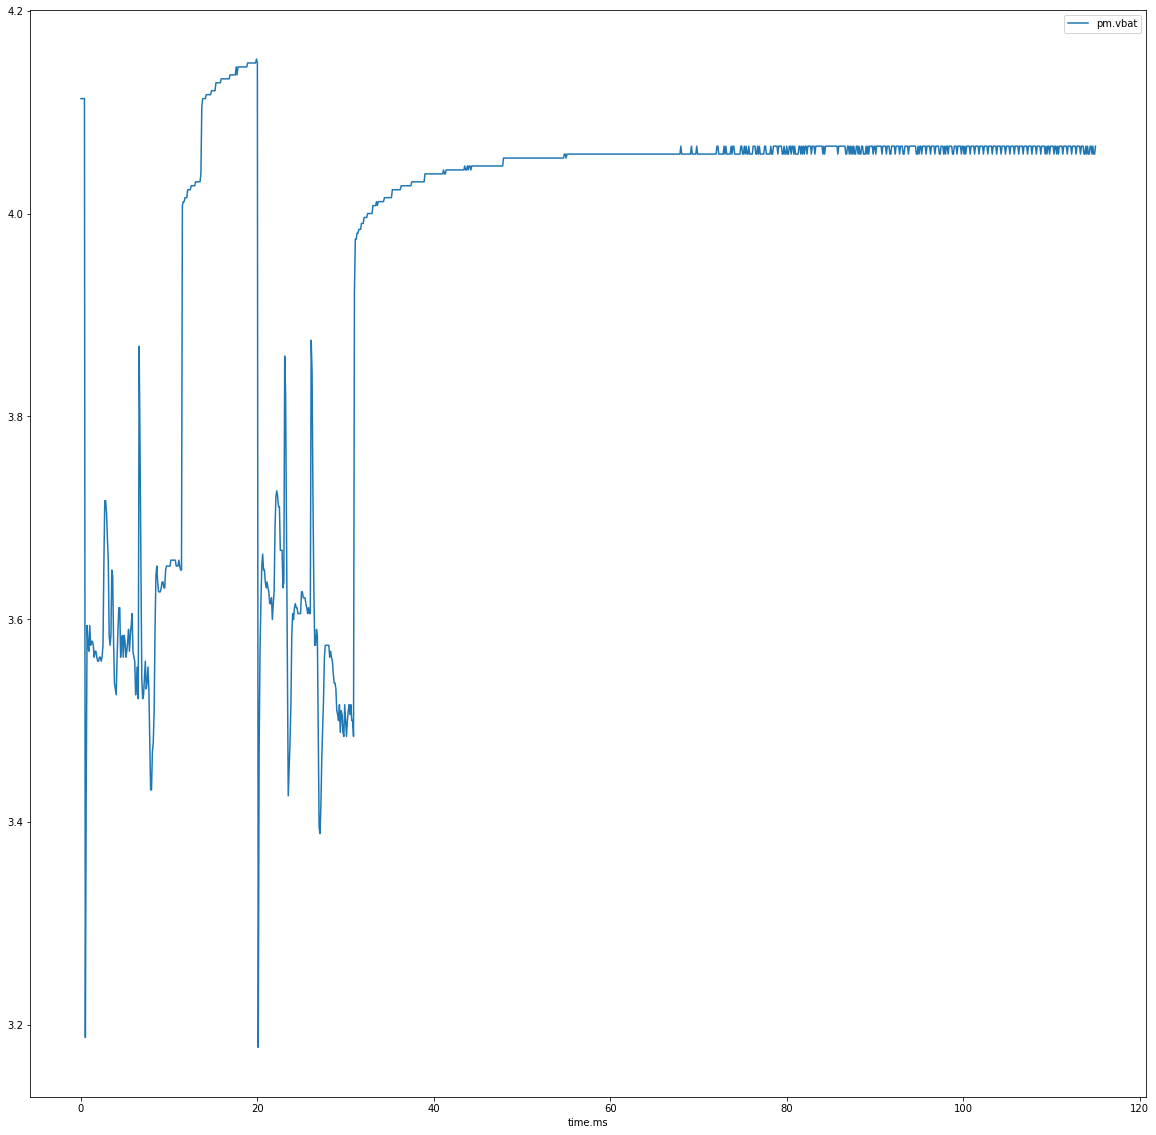

Gradient of Segment 1 E7 No Wind: -0.0034619701036654516
Gradient of Segment 2 E7 No Wind: -0.015497605316412656


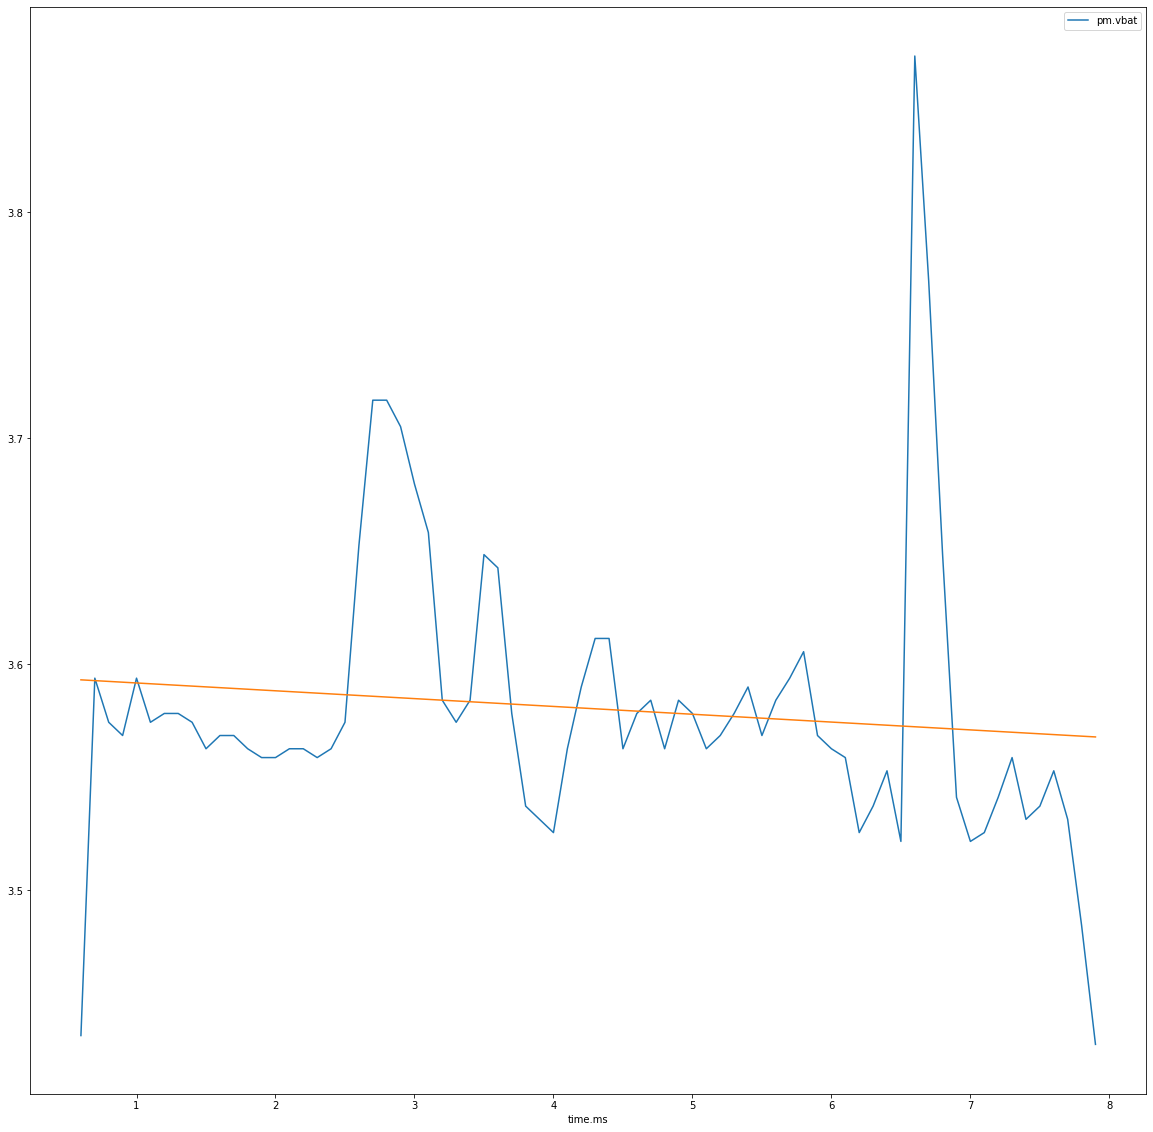

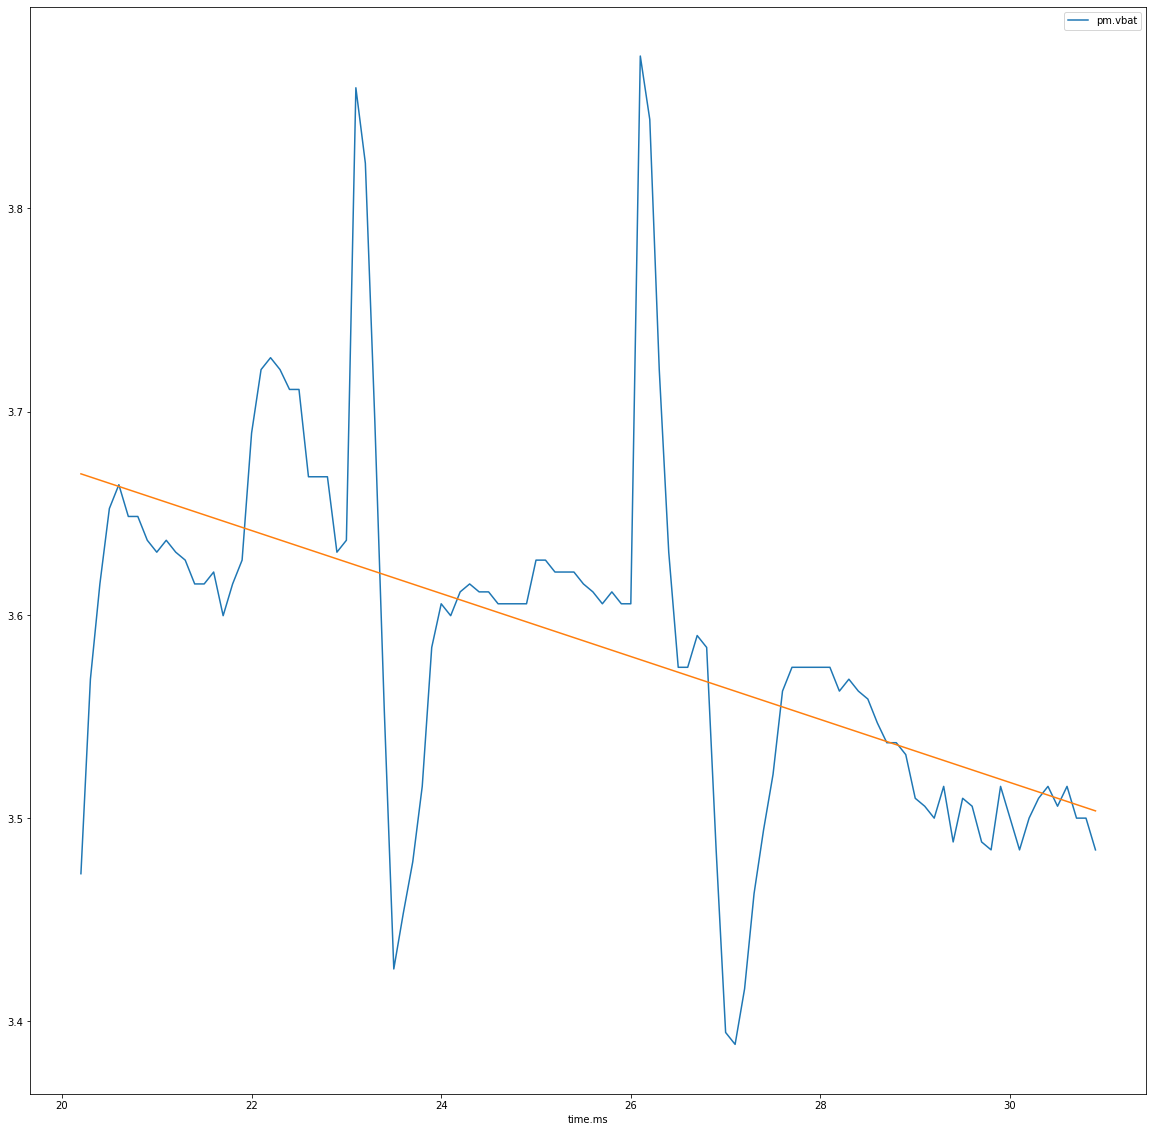

In [84]:
# E7 No Wind Segments

dataE7_no_wind.plot(x='time.ms', y='pm.vbat')
plt.show()

# E7 No Wind Segment 1
E7_nowind_1 = dataE7_no_wind.loc[(dataE7_no_wind['time.ms'] > 0) & (dataE7_no_wind['time.ms'] < 8) & (dataE7_no_wind['pm.vbat'] > 3.4) & (dataE7_no_wind['pm.vbat'] < 3.9)]
E7_nowind_1.plot(x='time.ms', y = 'pm.vbat')
m701, b701 = np.polyfit(E7_nowind_1["time.ms"], E7_nowind_1["pm.vbat"], 1)
plt.plot(E7_nowind_1["time.ms"], m701*E7_nowind_1["time.ms"]+b701, label="No wind")
print("Gradient of Segment 1 E7 No Wind: "+str(m701))


# E7 No Wind Segment 2
E7_nowind_2 = dataE7_no_wind.loc[(dataE7_no_wind['time.ms'] > 18) & (dataE7_no_wind['time.ms'] < 40) & (dataE7_no_wind['pm.vbat'] > 3.3) & (dataE7_no_wind['pm.vbat'] < 3.9)]
E7_nowind_2.plot(x='time.ms', y = 'pm.vbat')
m702, b702 = np.polyfit(E7_nowind_2["time.ms"], E7_nowind_2["pm.vbat"], 1)
plt.plot(E7_nowind_2["time.ms"], m702*E7_nowind_2["time.ms"]+ b702, label="No wind")
print("Gradient of Segment 2 E7 No Wind: "+str(m702))




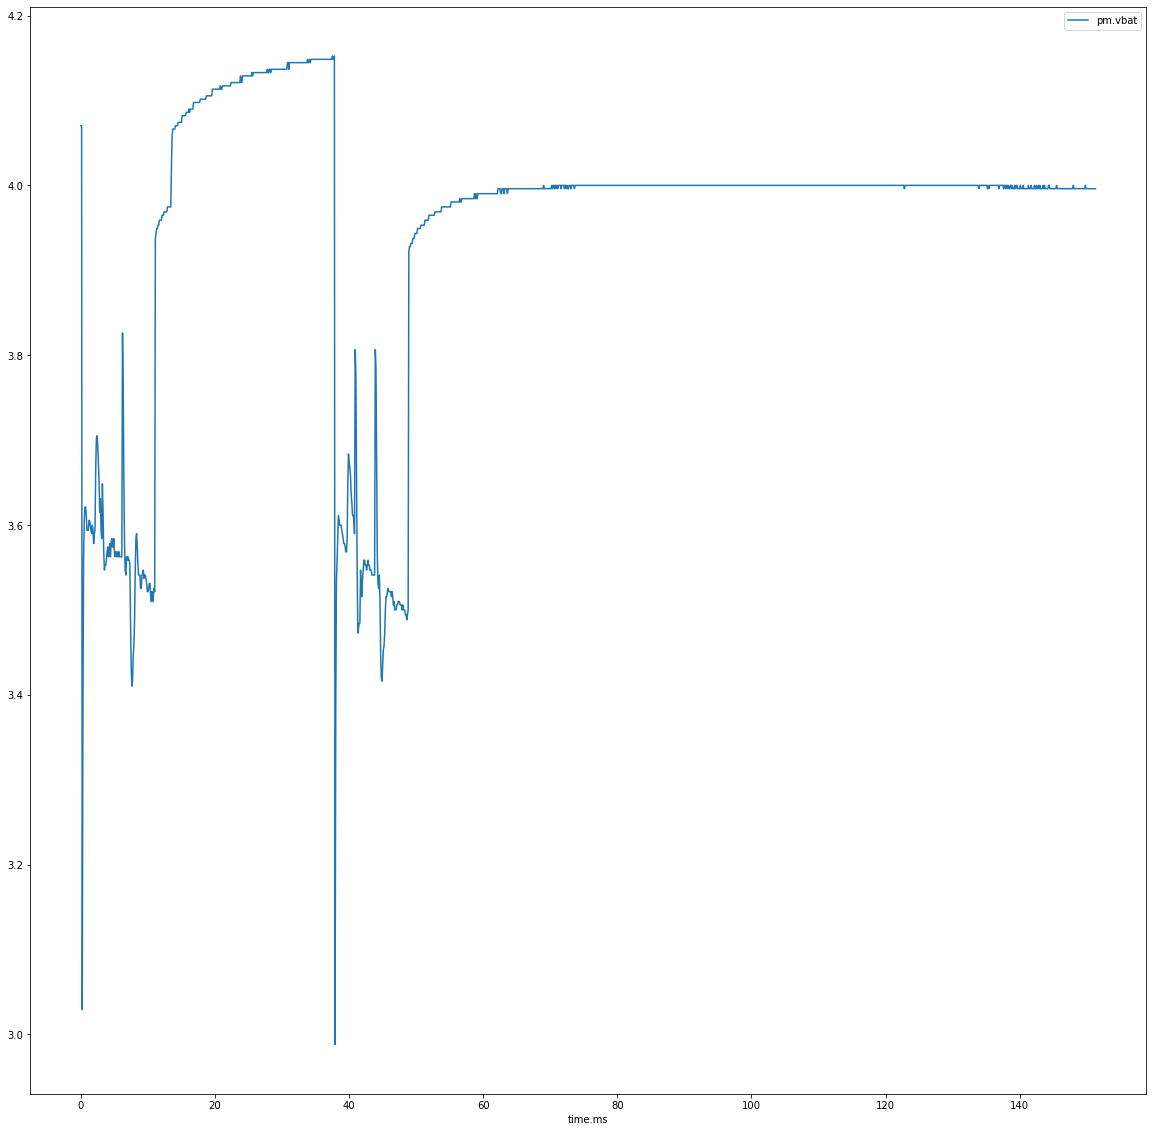

-0.009391530492916958
Relative wind direction:     relative_wind_direction
60                    189.0
-0.011220277816729934
     relative_wind_direction
420                    178.0


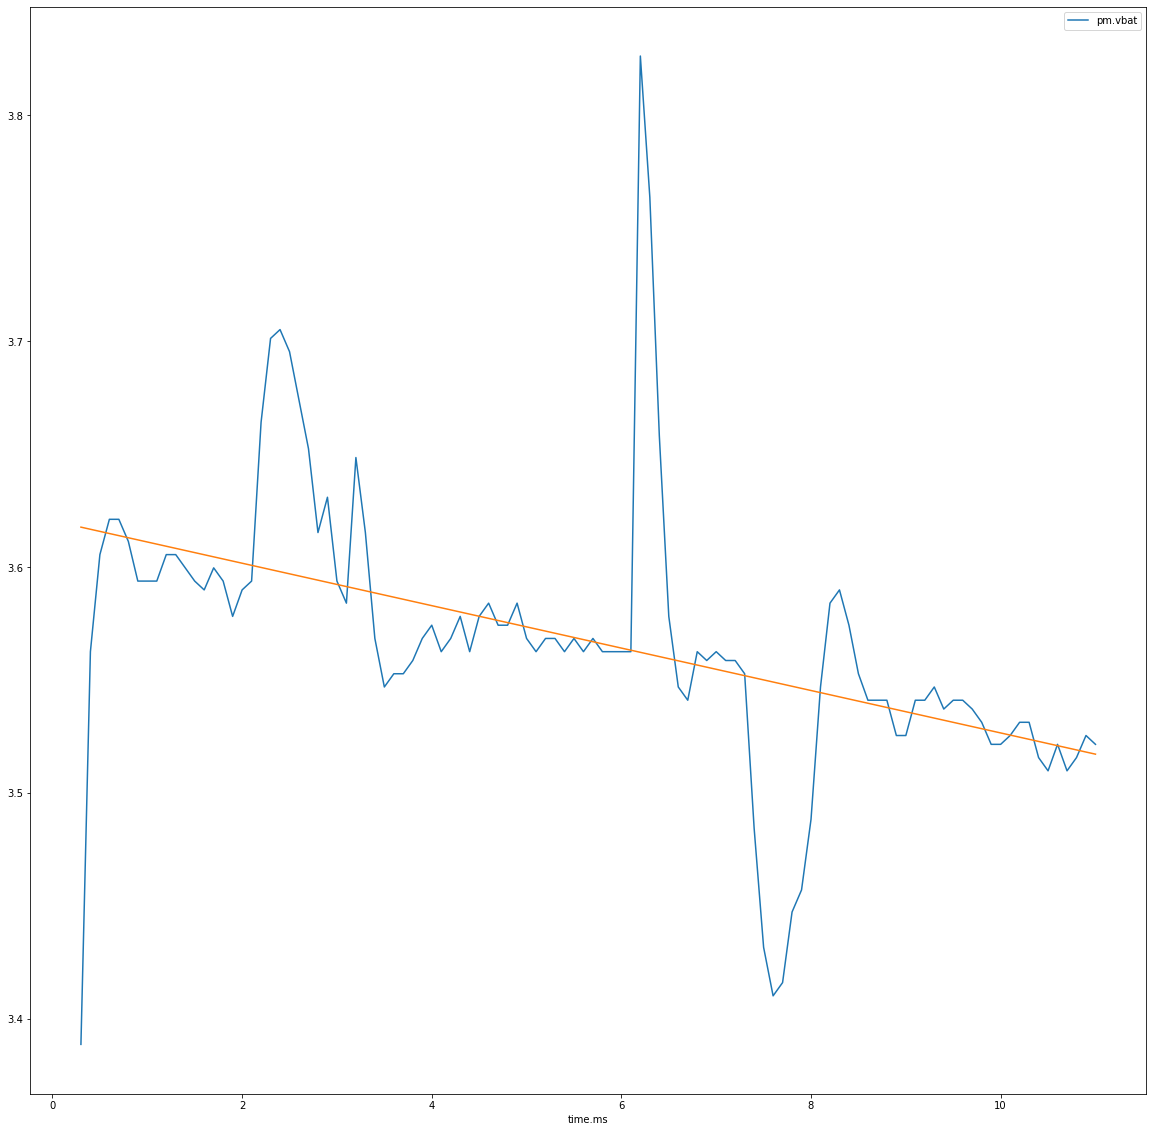

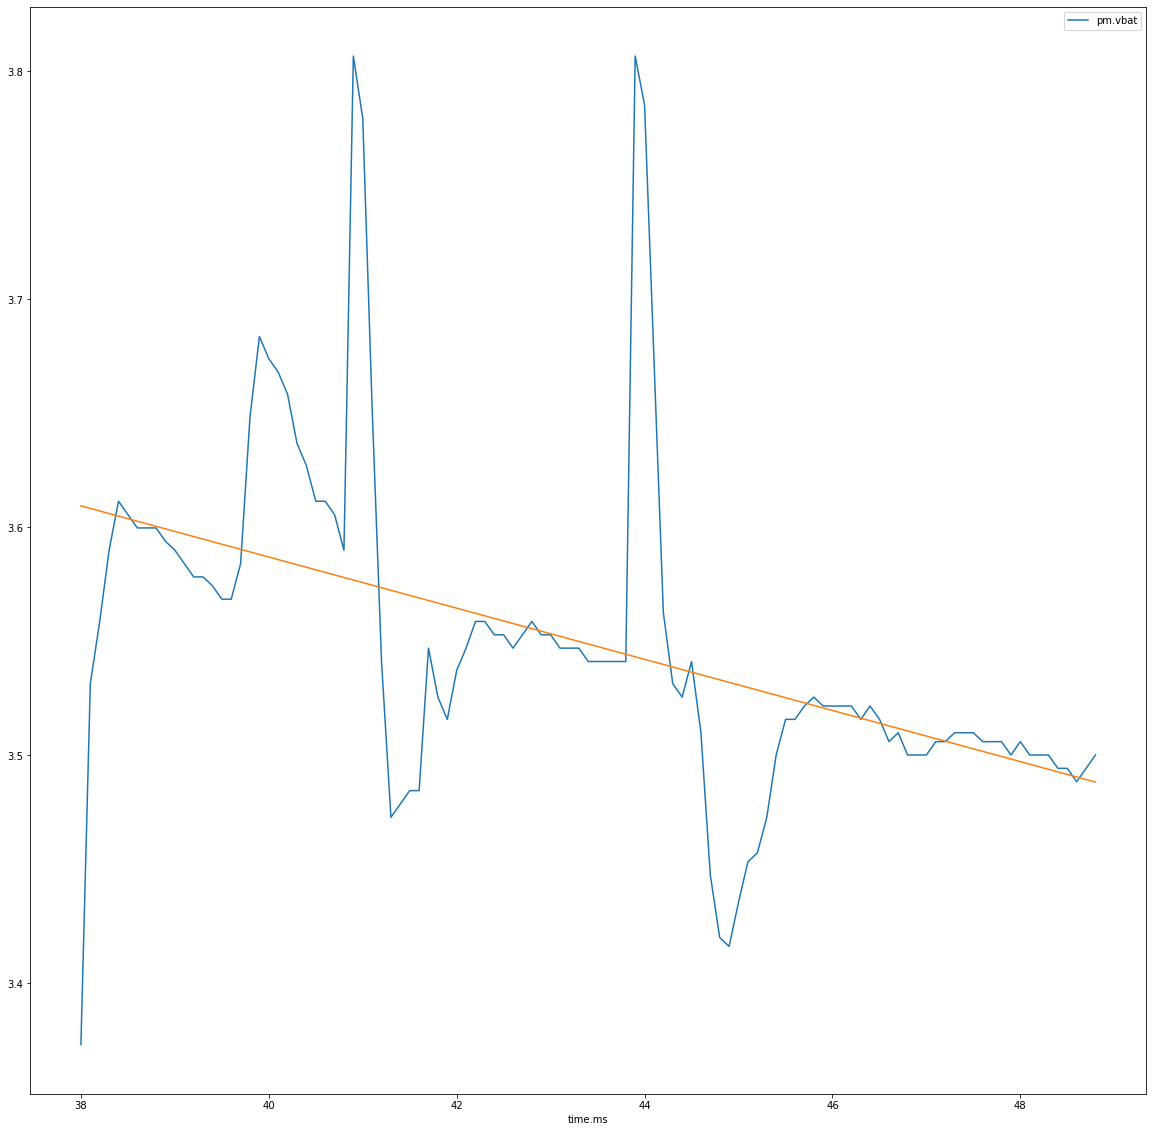

In [85]:
# E7 Wind 1 Segments 

dataE7_wind1.plot(x='time.ms', y='pm.vbat')
plt.show()

# E7 Wind 1 Segment 1
E7_wind1_1 = dataE7_wind1.loc[(dataE7_wind1['time.ms'] > 0) & (dataE7_wind1['time.ms'] < 18) & (dataE7_wind1['pm.vbat'] > 3.3) & (dataE7_wind1['pm.vbat'] < 3.9)]
E7_wind1_1.plot(x='time.ms', y = 'pm.vbat')
m711, b711 = np.polyfit(E7_wind1_1["time.ms"], E7_wind1_1["pm.vbat"], 1)
plt.plot(E7_wind1_1["time.ms"], m711*E7_wind1_1["time.ms"]+b711, label="Wind 1")
print(m711)



# Relative Wind Angle
E7_wind1_1_angle = dataE7_wind1.loc[(dataE7_wind1["time.ms"] == 6), ['relative_wind_direction']]
print("Relative wind direction: "+str(E7_wind1_1_angle))

# E7 Wind 1 Segment 2
E7_wind1_2 = dataE7_wind1.loc[(dataE7_wind1['time.ms'] > 20) & (dataE7_wind1['time.ms'] < 50) & (dataE7_wind1['pm.vbat'] > 3.3) & (dataE7_wind1['pm.vbat'] < 3.9)]
E7_wind1_2.plot(x='time.ms', y = 'pm.vbat')
m712, b712 = np.polyfit(E7_wind1_2["time.ms"], E7_wind1_2["pm.vbat"], 1)
plt.plot(E7_wind1_2["time.ms"], m712*E7_wind1_2["time.ms"]+b712, label="Wind 1")
print(m712)

E7_wind1_2_angle = dataE7_wind1.loc[(dataE7_wind1["time.ms"] == 42), ['relative_wind_direction']]
print(E7_wind1_2_angle)




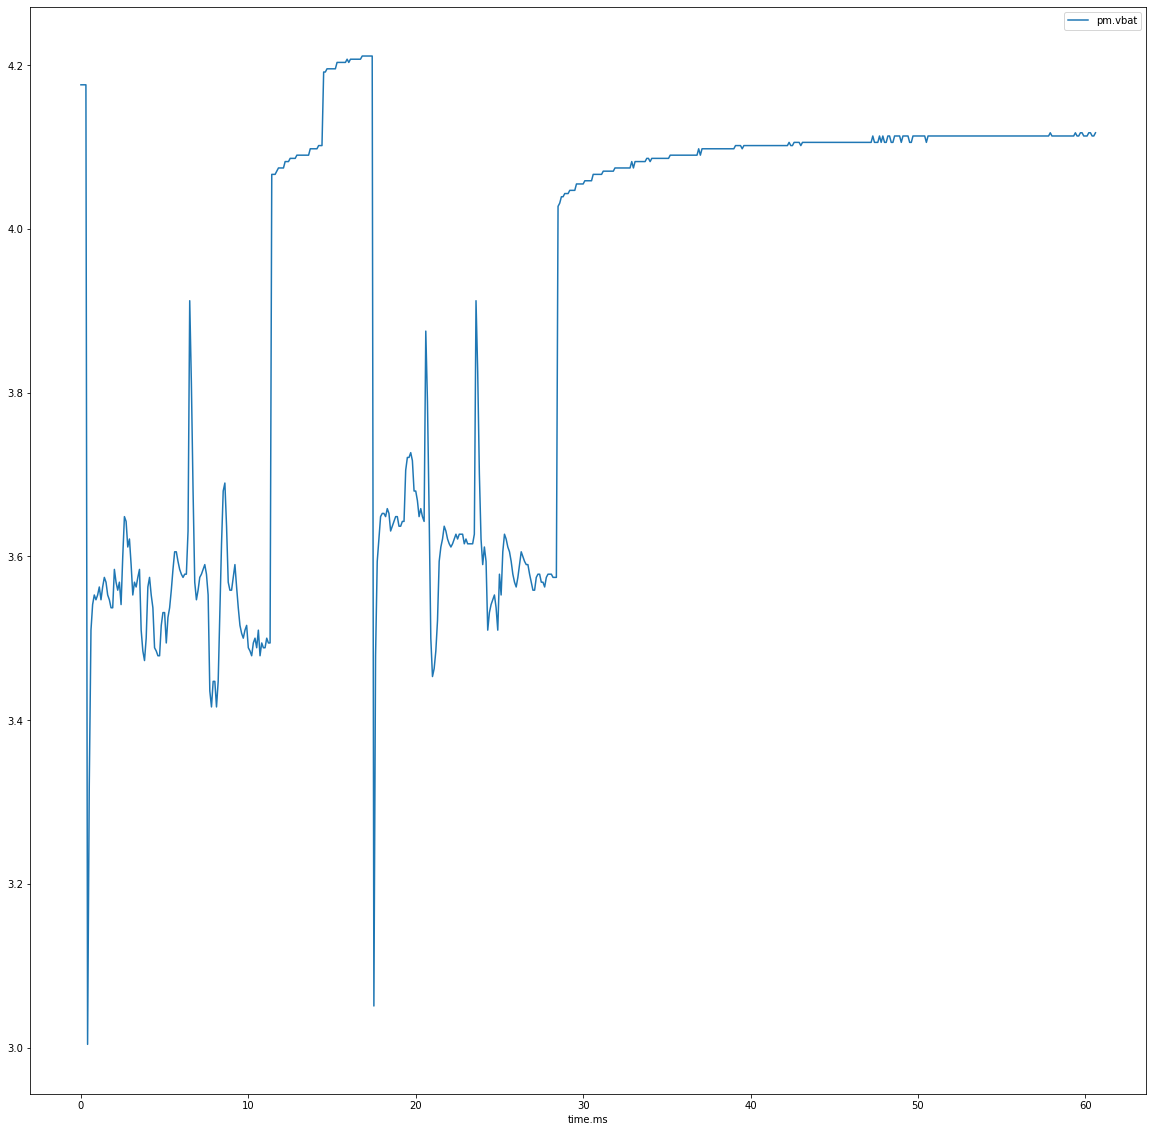

Gradient of E7 Segment 1 Wind 2: -0.0034136548863866164
    relative_wind_direction
55                    189.0
-0.008409852320178091
     relative_wind_direction
224                    178.0


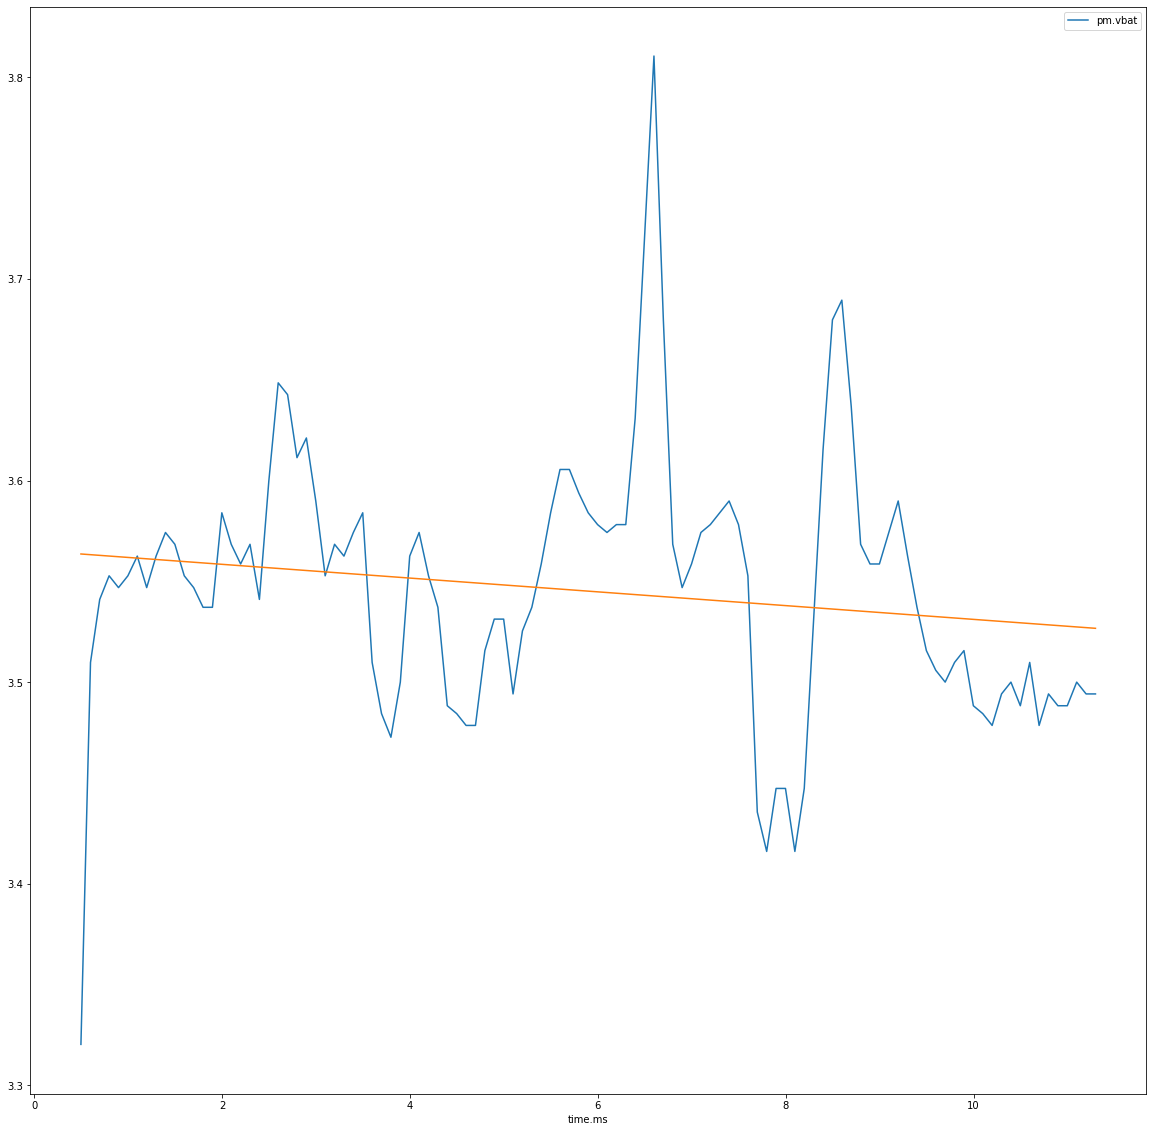

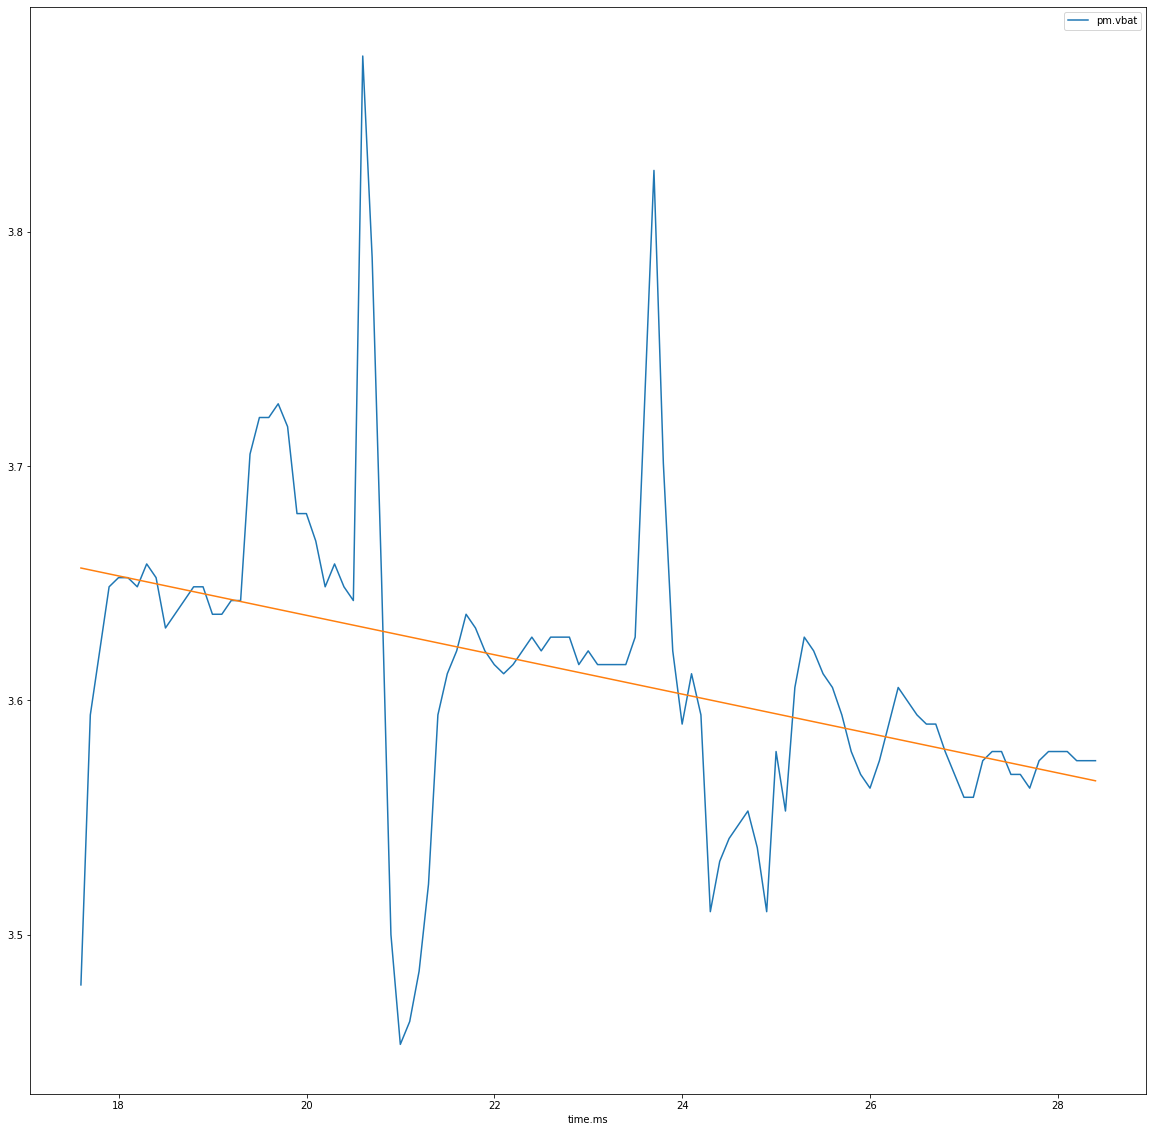

In [86]:
# E7 Wind 2 Segments
dataE7_wind2.plot(x='time.ms', y='pm.vbat')
plt.show()

# E5 Wind 2 Segment 1
E7_wind2_1 = dataE7_wind2.loc[(dataE7_wind2['time.ms'] > 0) & (dataE7_wind2['time.ms'] < 15) & (dataE7_wind2['pm.vbat'] > 3.3) & (dataE7_wind2['pm.vbat'] < 3.9)]
E7_wind2_1.plot(x='time.ms', y = 'pm.vbat')
m721, b721 = np.polyfit(E7_wind2_1["time.ms"], E7_wind2_1["pm.vbat"], 1)
plt.plot(E7_wind2_1["time.ms"], m721*E7_wind2_1["time.ms"]+b721, label="Wind 2")
print("Gradient of E7 Segment 1 Wind 2: "+ str(m721))

# Relative Wind Angle
E7_wind2_1_angle = dataE7_wind2.loc[(dataE7_wind2["time.ms"] == 5.498), ['relative_wind_direction']]
print(E7_wind2_1_angle)

# E5 Wind 2 Segment 2
E7_wind2_2 = dataE7_wind2.loc[(dataE7_wind2['time.ms'] > 15) & (dataE7_wind2['time.ms'] < 30) & (dataE7_wind2['pm.vbat'] > 3.3) & (dataE7_wind2['pm.vbat'] < 3.9)]
E7_wind2_2.plot(x='time.ms', y = 'pm.vbat')
m722, b722 = np.polyfit(E7_wind2_2["time.ms"], E7_wind2_2["pm.vbat"], 1)
plt.plot(E7_wind2_2["time.ms"], m722*E7_wind2_2["time.ms"]+b722, label="Wind 2")
print(m722)

E7_wind2_2_angle = dataE7_wind2.loc[(dataE7_wind2["time.ms"] == 22.398), ['relative_wind_direction']]
print(E7_wind2_2_angle)


In [87]:
# Gradient over Voltage
speed1df = pd.DataFrame({
    'Gradient':[m311, m312, m321, m322, m511, m512, m521, m522, m711, m712, m721, m722],
    
})
print(speed1df['Gradient'])
# speed1df.plot.scatter(x='Angle', y='Gradient')
# plt.show()

0    -0.028921
1    -0.011936
2    -0.007817
3    -0.021663
4    -0.004736
5    -0.007721
6    -0.006714
7    -0.007898
8    -0.009392
9    -0.011220
10   -0.003414
11   -0.008410
Name: Gradient, dtype: float64


<AxesSubplot:title={'center':'-0.011936349495382284'}, xlabel='time.ms'>

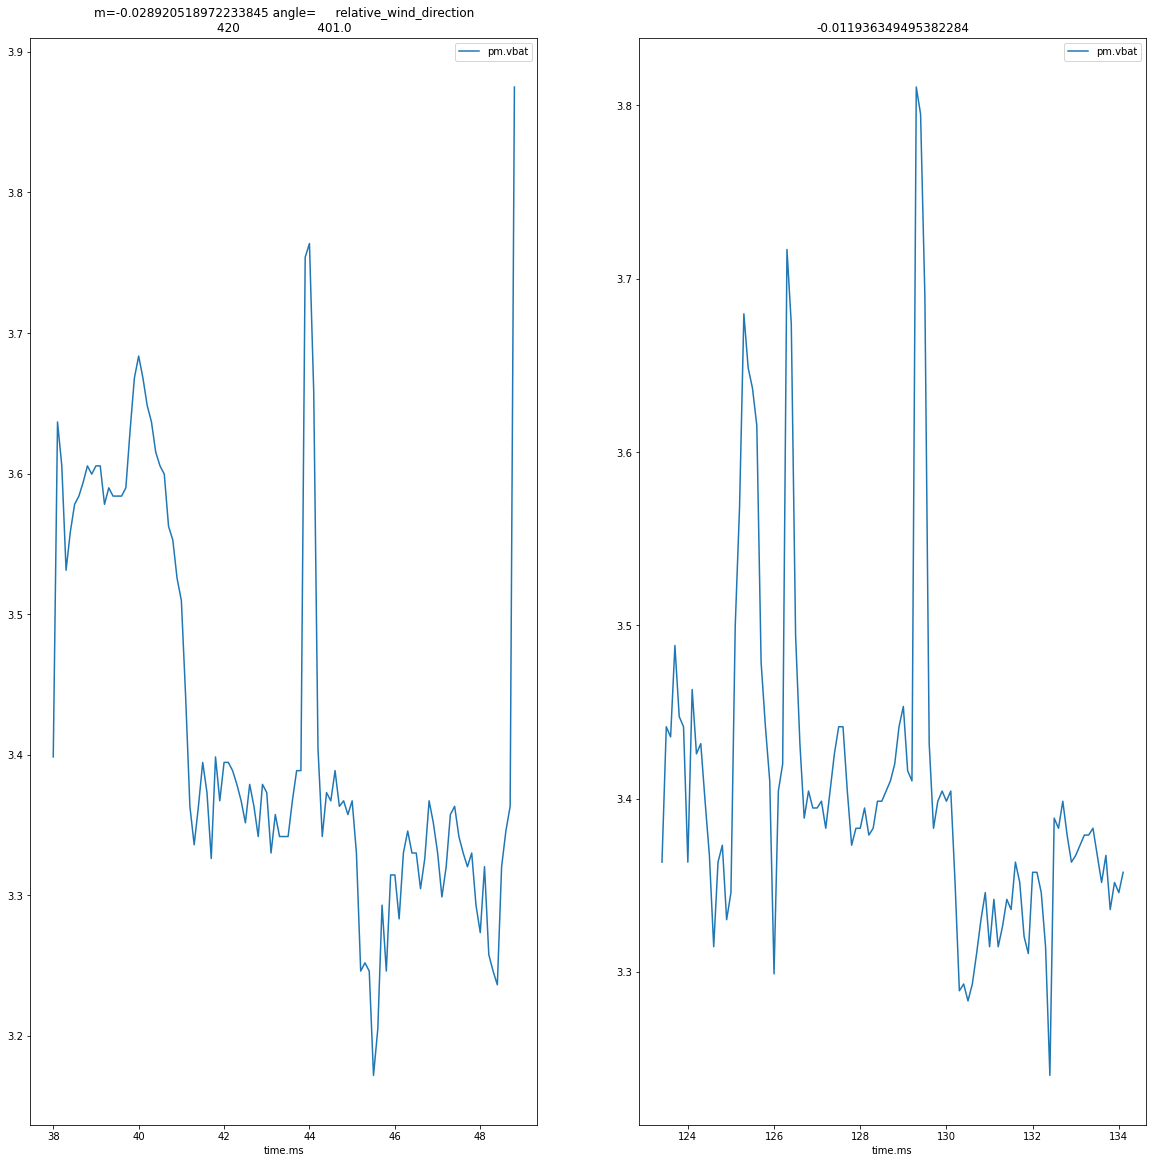

In [88]:
# Subplot Combine

figure, axes = plt.subplots(1,2)
# E301
E311 = E3_wind1_1[['time.ms','pm.vbat']]
# E321
E312 = E3_wind1_2[['time.ms','pm.vbat']]

E311.plot(ax=axes[0], x='time.ms', y='pm.vbat', title="m="+str(m311)+" angle="+str(E3_wind1_1_angle))
E312.plot(ax=axes[1], x='time.ms', y='pm.vbat', title=m312)


# axis[1,0].E3_wind2_1.plot(x='time.ms', y = 'pm.vbat')



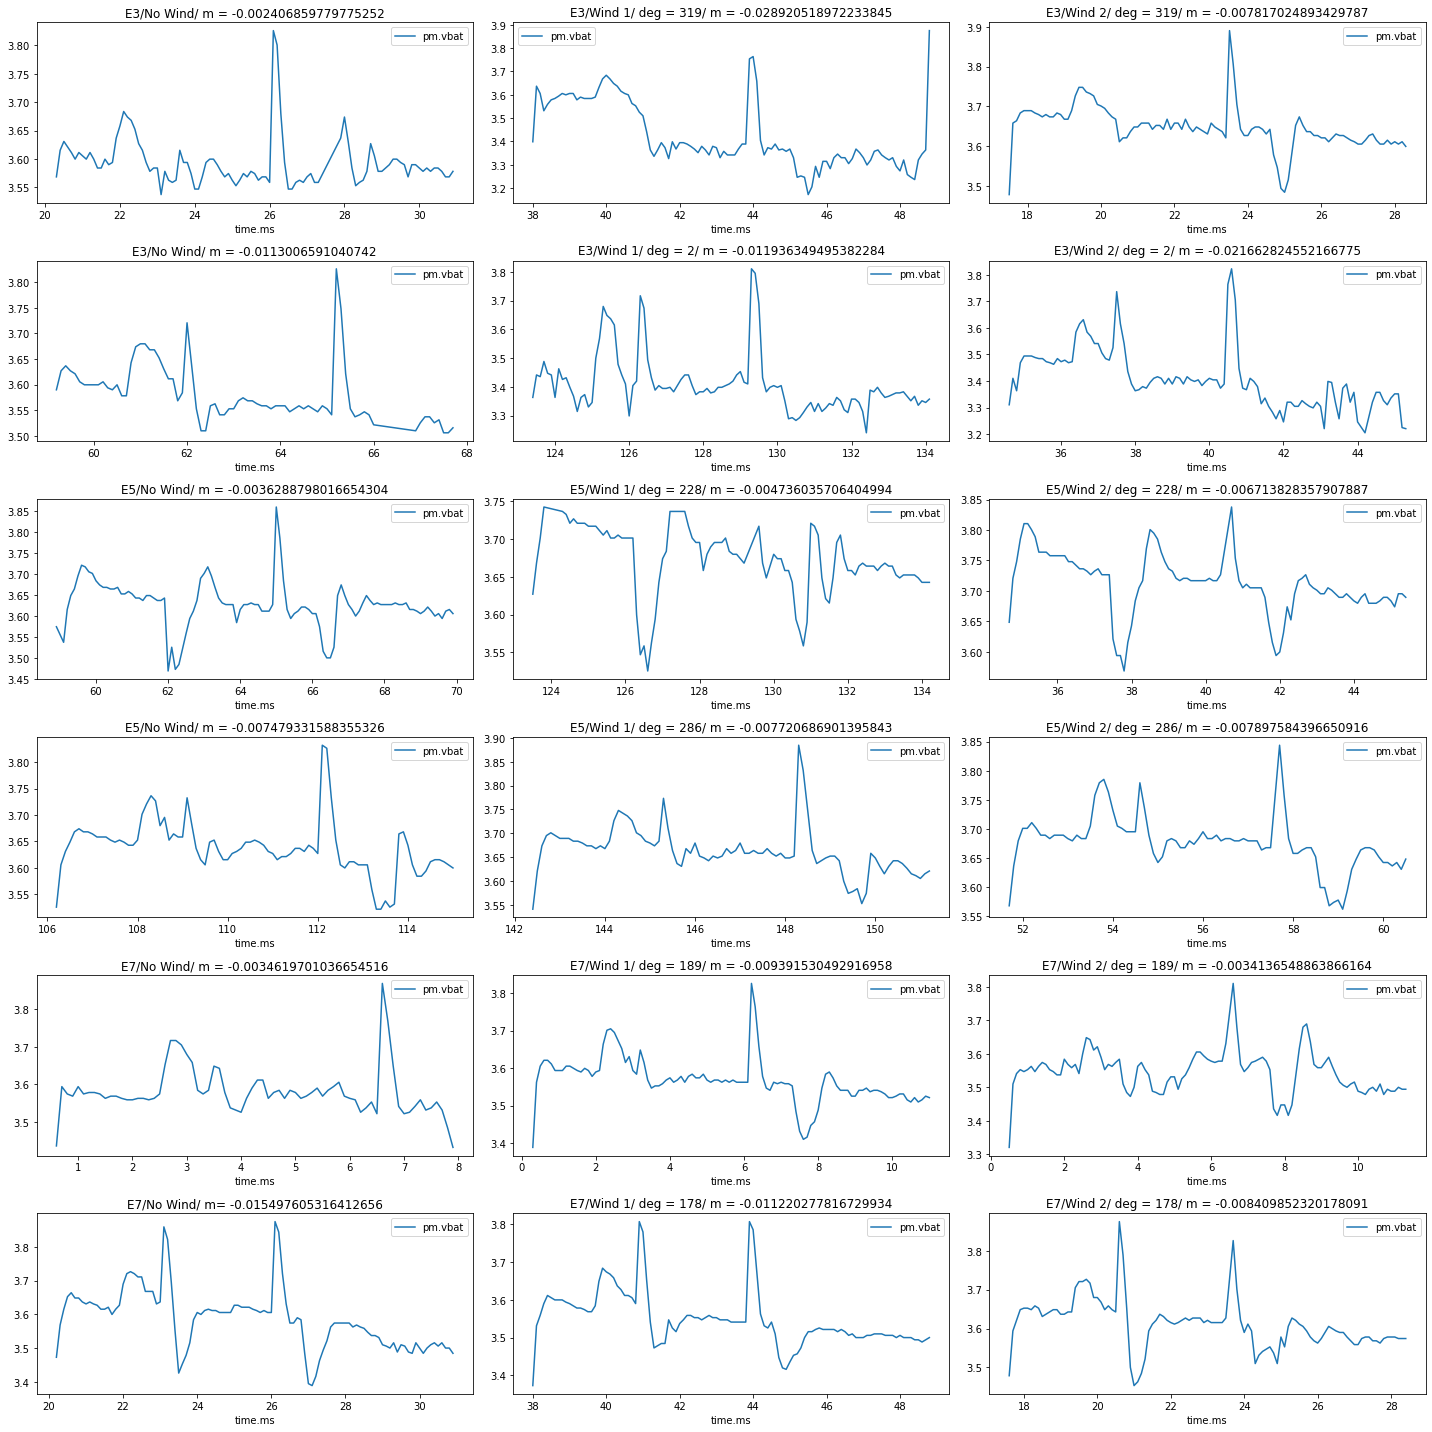

In [123]:
# Subplot Combine

plt.rcParams['figure.figsize'] = [20, 20]

figure, axes = plt.subplots(6,3)

E301 = E3_nowind_1[['time.ms','pm.vbat']]
E302 = E3_nowind_2[['time.ms','pm.vbat']]
E501 = E5_nowind_1[['time.ms','pm.vbat']]
E502 = E5_nowind_2[['time.ms','pm.vbat']]
E701 = E7_nowind_1[['time.ms','pm.vbat']]
E702 = E7_nowind_2[['time.ms','pm.vbat']]

E311 = E3_wind1_1[['time.ms','pm.vbat']]
E312 = E3_wind1_2[['time.ms','pm.vbat']]
E511 = E5_wind1_1[['time.ms','pm.vbat']]
E512 = E5_wind1_2[['time.ms','pm.vbat']]
E711 = E7_wind1_1[['time.ms','pm.vbat']]
E712 = E7_wind1_2[['time.ms','pm.vbat']]

E321 = E3_wind2_1[['time.ms','pm.vbat']]
E322 = E3_wind2_2[['time.ms','pm.vbat']]
E521 = E5_wind2_1[['time.ms','pm.vbat']]
E522 = E5_wind2_2[['time.ms','pm.vbat']]
E721 = E7_wind2_1[['time.ms','pm.vbat']]
E722 = E7_wind2_2[['time.ms','pm.vbat']]



E301.plot(ax=axes[0,0], x='time.ms', y='pm.vbat', title="E3/No Wind/ m = "+str(m301))
E302.plot(ax=axes[1,0], x='time.ms', y='pm.vbat', title="E3/No Wind/ m = "+str(m302))
E501.plot(ax=axes[2,0], x='time.ms', y='pm.vbat', title="E5/No Wind/ m = "+str(m501))
E502.plot(ax=axes[3,0], x='time.ms', y='pm.vbat', title="E5/No Wind/ m = "+str(m502))
E701.plot(ax=axes[4,0], x='time.ms', y='pm.vbat', title="E7/No Wind/ m = "+str(m701))
E702.plot(ax=axes[5,0], x='time.ms', y='pm.vbat', title="E7/No Wind/ m= "+str(m702))

E311.plot(ax=axes[0,1], x='time.ms', y='pm.vbat', title="E3/Wind 1/ deg = 319/ m = "+str(m311))
E312.plot(ax=axes[1,1], x='time.ms', y='pm.vbat', title="E3/Wind 1/ deg = 2/ m = "+str(m312))
E511.plot(ax=axes[2,1], x='time.ms', y='pm.vbat', title="E5/Wind 1/ deg = 228/ m = "+str(m511))
E512.plot(ax=axes[3,1], x='time.ms', y='pm.vbat', title="E5/Wind 1/ deg = 286/ m = "+str(m512))
E711.plot(ax=axes[4,1], x='time.ms', y='pm.vbat', title="E7/Wind 1/ deg = 189/ m = "+str(m711))
E712.plot(ax=axes[5,1], x='time.ms', y='pm.vbat', title="E7/Wind 1/ deg = 178/ m = "+str(m712))

E321.plot(ax=axes[0,2], x='time.ms', y='pm.vbat', title="E3/Wind 2/ deg = 319/ m = "+str(m321))
E322.plot(ax=axes[1,2], x='time.ms', y='pm.vbat', title="E3/Wind 2/ deg = 2/ m = "+str(m322))
E521.plot(ax=axes[2,2], x='time.ms', y='pm.vbat', title="E5/Wind 2/ deg = 228/ m = "+str(m521))
E522.plot(ax=axes[3,2], x='time.ms', y='pm.vbat', title="E5/Wind 2/ deg = 286/ m = "+str(m522))
E721.plot(ax=axes[4,2], x='time.ms', y='pm.vbat', title="E7/Wind 2/ deg = 189/ m = "+str(m721))
E722.plot(ax=axes[5,2], x='time.ms', y='pm.vbat', title="E7/Wind 2/ deg = 178/ m = "+str(m722))

figure.tight_layout()

# figure.savefig('Path5_Inter1_Ang90_Segments.png', facecolor='white', edgecolor='black')



# axis[1,0].E3_wind2_1.plot(x='time.ms', y = 'pm.vbat')



/var/folders/_y/lf_zrwbn3136_y2yw8d5lrm00000gn/T/ipykernel_95182/3626214686.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E311_time_change["time.ms"] = E311_time_change["time.ms"].map(lambda x : x - 17.9 )
/var/folders/_y/lf_zrwbn3136_y2yw8d5lrm00000gn/T/ipykernel_95182/3626214686.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E321_time_change["time.ms"] = E321_time_change["time.ms"].map(lambda x : x + 2.5)
/var/folders/_y/lf_zrwbn3136_y2yw8d5lrm00000gn/T/ipykernel_95182/3626214686.py:24: Setti

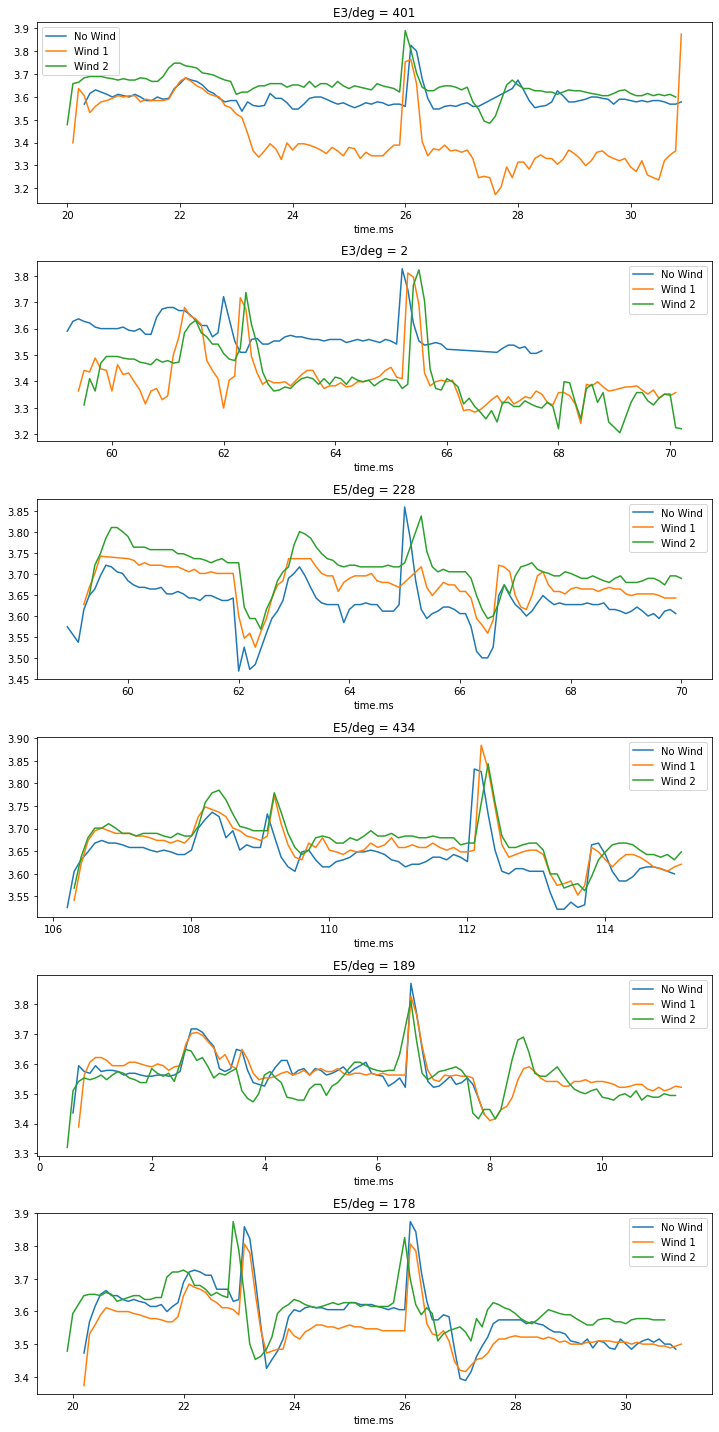

In [122]:
# Combined Graphs
plt.rcParams['figure.figsize'] = [10, 20]
figure1, axes1 = plt.subplots(6,1)

# Altered Time Stamps:
# E301 = E3_nowind_1[['time.ms','pm.vbat']]
# E302 = E3_nowind_2[['time.ms','pm.vbat']]
# E501 = E5_nowind_1[['time.ms','pm.vbat']]
# E502 = E5_nowind_2[['time.ms','pm.vbat']]
# E701 = E7_nowind_1[['time.ms','pm.vbat']]
# E702 = E7_nowind_2[['time.ms','pm.vbat']]

# Seg 1:

E311_time_change = E3_wind1_1[['time.ms','pm.vbat']]
E311_time_change["time.ms"] = E311_time_change["time.ms"].map(lambda x : x - 17.9 )

E321_time_change = E3_wind2_1[['time.ms','pm.vbat']]
E321_time_change["time.ms"] = E321_time_change["time.ms"].map(lambda x : x + 2.5)

# Segment 2:

E312_time_change = E3_wind1_2[['time.ms','pm.vbat']]
E312_time_change["time.ms"] = E312_time_change["time.ms"].map(lambda x : x - 64 )

E322_time_change = E3_wind2_2[['time.ms','pm.vbat']]
E322_time_change["time.ms"] = E322_time_change["time.ms"].map(lambda x : x + 24.9)

# Segment 3:
E511_time_change = E5_wind1_1[['time.ms','pm.vbat']]
E511_time_change["time.ms"] = E511_time_change["time.ms"].map(lambda x : x -64.3)

E521_time_change = E5_wind2_1[['time.ms','pm.vbat']]
E521_time_change["time.ms"] = E521_time_change["time.ms"].map(lambda x : x + 24.6)

# Segment 4
E512_time_change = E5_wind1_2[['time.ms','pm.vbat']]
E512_time_change["time.ms"] = E512_time_change["time.ms"].map(lambda x : x - 36.1 )

E522_time_change = E5_wind2_2[['time.ms','pm.vbat']]
E522_time_change["time.ms"] = E522_time_change["time.ms"].map(lambda x : x + 54.6)

# Segment 5
E711_time_change = E7_wind1_1[['time.ms','pm.vbat']]
E711_time_change["time.ms"] = E711_time_change["time.ms"].map(lambda x : x + 0.4 )

# Segment 6
E712_time_change = E7_wind1_2[['time.ms','pm.vbat']]
E712_time_change["time.ms"] = E712_time_change["time.ms"].map(lambda x : x - 17.8 )

E722_time_change = E7_wind2_2[['time.ms','pm.vbat']]
E722_time_change["time.ms"] = E722_time_change["time.ms"].map(lambda x : x + 2.3 )




# E511 = E5_wind1_1[['time.ms','pm.vbat']]
# E512 = E5_wind1_2[['time.ms','pm.vbat']]
# E711 = E7_wind1_1[['time.ms','pm.vbat']]
# E712 = E7_wind1_2[['time.ms','pm.vbat']]


# dataE3["time.ms"] = dataE3["time.ms"].map(lambda x : x/1000)
# E322 = E3_wind2_2[['time.ms','pm.vbat']]
# E521 = E5_wind2_1[['time.ms','pm.vbat']]
# E522 = E5_wind2_2[['time.ms','pm.vbat']]
# E721 = E7_wind2_1[['time.ms','pm.vbat']]
# E722 = E7_wind2_2[['time.ms','pm.vbat']]

# Segment 1
seg1 = E301.plot(ax=axes1[0], x='time.ms', y='pm.vbat', title="E3/deg = 401", label='No Wind')
E311_time_change.plot(ax=seg1, x='time.ms', y='pm.vbat', label='Wind 1' )
E321_time_change.plot(ax=seg1, x='time.ms', y='pm.vbat', label='Wind 2')

# Segment 2
seg2 = E302.plot(ax=axes1[1], x='time.ms', y='pm.vbat', title="E3/deg = 2", label='No Wind')
E312_time_change.plot(ax=seg2, x='time.ms', y='pm.vbat', label='Wind 1' )
E322_time_change.plot(ax=seg2, x='time.ms', y='pm.vbat', label='Wind 2')

# Segment 3
seg3 = E501.plot(ax=axes1[2], x='time.ms', y='pm.vbat', title="E5/deg = 228", label='No Wind')
E511_time_change.plot(ax=seg3, x='time.ms', y='pm.vbat', label='Wind 1' )
E521_time_change.plot(ax=seg3, x='time.ms', y='pm.vbat', label='Wind 2')


# Segment 4
seg4 = E502.plot(ax=axes1[3], x='time.ms', y='pm.vbat', title="E5/deg = 434", label='No Wind')
E512_time_change.plot(ax=seg4, x='time.ms', y='pm.vbat', label='Wind 1' )
E522_time_change.plot(ax=seg4, x='time.ms', y='pm.vbat', label='Wind 2')

# Segment 5
seg5 = E701.plot(ax=axes1[4], x='time.ms', y='pm.vbat', title="E5/deg = 189", label='No Wind')
E711_time_change.plot(ax=seg5, x='time.ms', y='pm.vbat', label='Wind 1' )
E721.plot(ax=seg5, x='time.ms', y='pm.vbat', label='Wind 2')

# Segment 6
seg6 = E702.plot(ax=axes1[5], x='time.ms', y='pm.vbat', title="E5/deg = 178", label='No Wind')
E712_time_change.plot(ax=seg6, x='time.ms', y='pm.vbat', label='Wind 1' )
E722_time_change.plot(ax=seg6, x='time.ms', y='pm.vbat', label='Wind 2')

figure1.tight_layout()

# figure1.savefig('Path5_Inter1_Ang90_Overlap_Seg.png', facecolor='white', edgecolor='black')


